## Smoke drink predictor

- Sex	male, female	
- age	round up to 5 years	
- height	round up to 5 cm[cm]
- weight	[kg]	
- sight_left	eyesight(left)	
- sight_right	eyesight(right)	
- hear_left	hearing left, 1(normal), 2(abnormal
- hear_right	hearing right, 1(normal), 2(abnormal)
- SBP	Systolic blood pressure[mmHg]
- DBP	Diastolic blood pressure[mmHg]
- BLDS	BLDS or FSG(fasting blood glucose)[mg/dL]
- tot_chole	total cholesterol[mg/dL]
- HDL_chole	HDL cholesterol[mg/dL]	HDL 
- LDL_chole	LDL cholesterol[mg/dL]	LDL 
- triglyceride	triglyceride[mg/dL]
- hemoglobin	hemoglobin[g/dL
- urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4
- serum_creatinine	serum(blood) creatinine[mg/dL]	
- SGOT_AST	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]	
- SGOT_ALT	ALT(Alanine transaminase)[IU/L]	
- gamma_GTP	y-glutamyl transpeptidase[IU/L]	]
- SMK_stat_type_cd	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke
- DRK_YN	Drinker or Not	

### IMPORTING PACKAGES

In [256]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA OVERVIEWS

In [257]:
data = pd.read_csv('./data/smoking_driking.csv')

In [258]:
data.head(2)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  

[2 rows x 24 columns]

In [259]:
data.shape

(991346, 24)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [261]:
data.describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  991346.000000  991346.000000  ...  991346.000000  991346.000000   
mean      122.432498      76.052627  ...      56.936800     113.037692   
std        14.543148       9.889365  ...      17.238479      35.842812   
min        67.000000      32.000000  ...       1.000000       1.000000   
25%       112.000000      70.000000  ...      46.000000      89.000000   
50%       120.000000      76.000000  ...      55.000000     111.000000   
75%       131.000000      82.000000  ...      66.000000     135.000000   
max       273.000000     185.000000  ...    8110.000000    5119.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  991346.000000  991346.000000  991346.000000     991346.000000   
mean      132.141751      14.229824       1.094224          0.860467   
std       102.196985       1.584929       0.437724          0.480530   
min         1.000000       1.000000       1.000000          0.100000   
25%        73.000000      13.200000       1.000000          0.700000   
50%       106.000000      14.300000       1.000000          0.800000   
75%       159.000000      15.400000       1.000000          1.000000   
max      9490.000000      25.000000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  991346.000000  991346.000000  991346.000000     991346.000000  
mean       25.989308      25.755051      37.136347          1.608122  
std        23.493386      26.308599      50.424153          0.818507  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      16.000000          1.000000  
50%        23.000000      20.000000      23.000000          1.000000  
75%        28.000000      29.000000      39.000000          2.000000  
max      9999.000000    7210.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [262]:
columns = data.columns
columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [263]:
data.describe(include=['O'])

sex  DRK_YN
count   991346  991346
unique       2       2
top       Male       N
freq    526415  495858

In [264]:
columns_with_missing_values = data.columns[data.isnull().sum() > 0]
print(columns_with_missing_values)

Index([], dtype='object')


In [265]:
sex_mapping = {'Male': 1, 'Female': 0} 
data['sex'] = data['sex'].map(sex_mapping)

drk_mapping = {'Y': 1, 'N': 0} 
data['DRK_YN'] = data['DRK_YN'].map(drk_mapping)

In [266]:

data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       1  
1               0.9      20.0      36.0       27.0               3.0       0  
2               0.9      47.0      32.0       68.0               1.0       0  
3               1.1      29.0      34.0       18.0               1.0       0  
4               0.8      19.0      12.0       25.0               1.0       0  

[5 rows x 24 columns]

In [267]:
is_smoking= data['SMK_stat_type_cd']
print(is_smoking.head())

is_drinking = data['DRK_YN']
print(is_drinking.head())

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64
0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64


In [268]:
current_y_is_smoking_or_drinking = 'SMK_stat_type_cd'
# current_y_is_smoking_or_drinking = 'DRK_YN'

### Categorical Variable Analysis

Plotting 1...


Plotting 2...
Plotting 3...
Plotting 4...
Plotting 5...
Plotting 6...
Plotting 7...
Plotting 8...
Plotting 9...
Plotting 10...
Plotting 11...


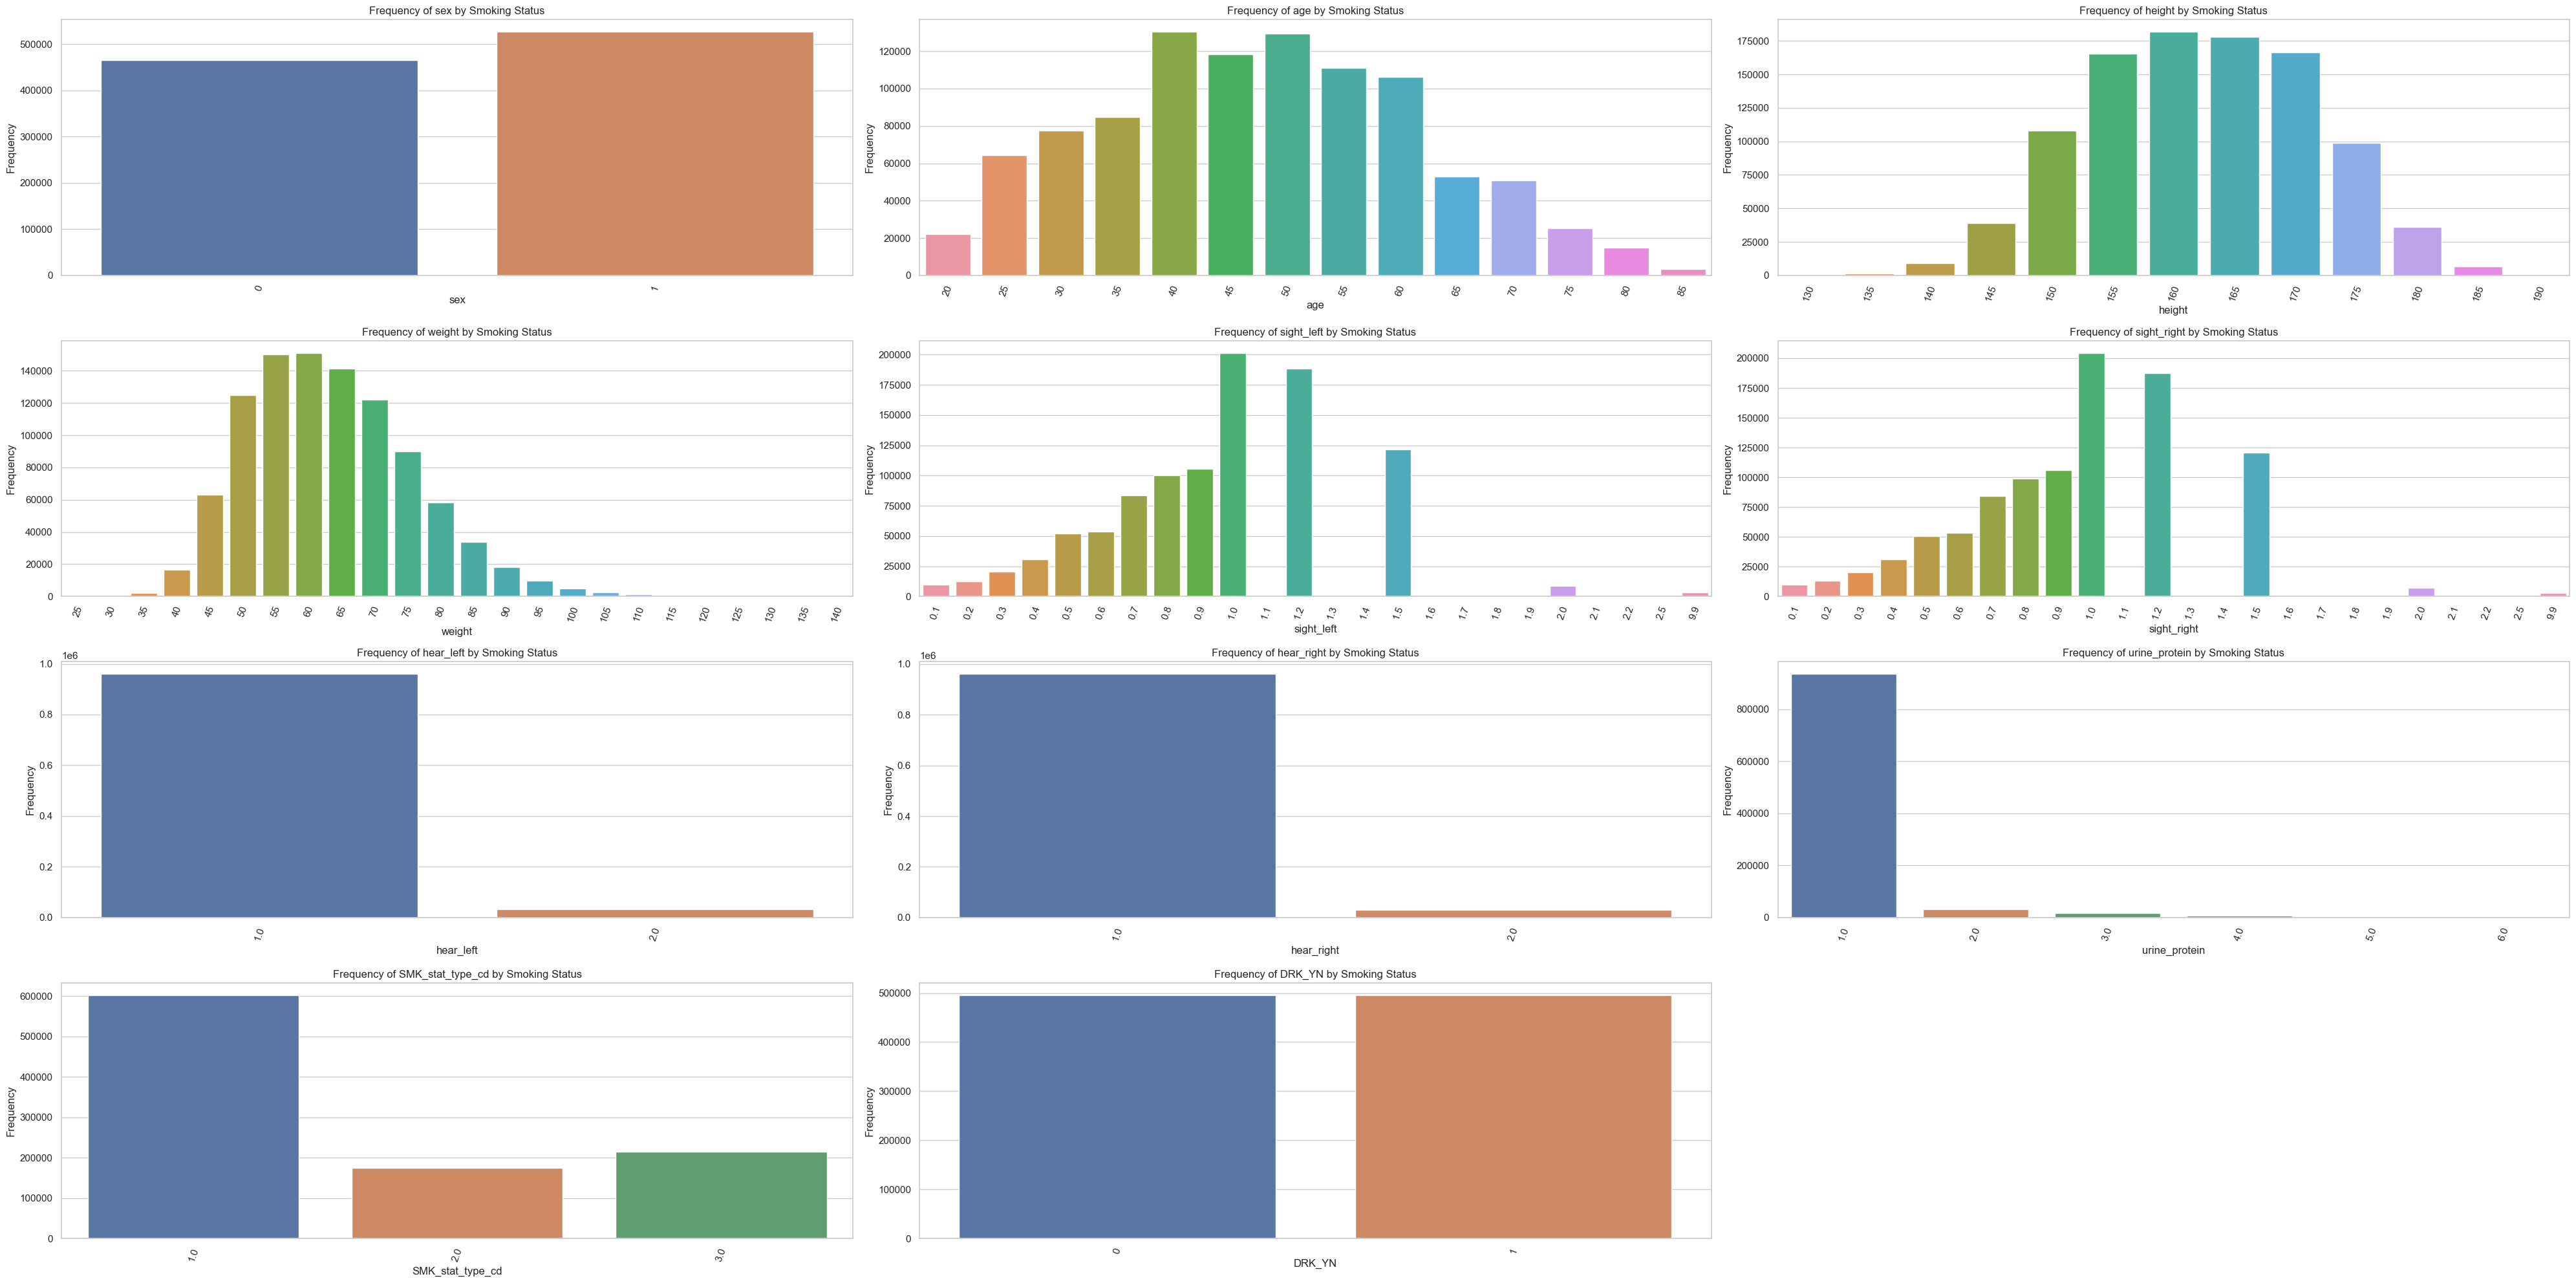

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                              "urine_protein", current_y_is_smoking_or_drinking, "DRK_YN"], start=1):

    print(f'Plotting {idx}...')

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=data)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

### Boxplot and removing outlier

In [270]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       1  
1               0.9      20.0      36.0       27.0               3.0       0  
2               0.9      47.0      32.0       68.0               1.0       0  
3               1.1      29.0      34.0       18.0               1.0       0  
4               0.8      19.0      12.0       25.0               1.0       0  

[5 rows x 24 columns]

In [271]:
is_smoking.head()

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64

In [272]:
is_drinking.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [273]:
data.shape

(991346, 24)

#### ANALYZING,  'sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'

Plotting 1...
Number of unique values :  2
Plotting 2...
Number of unique values :  14
Plotting 3...
Number of unique values :  13
Plotting 4...
Number of unique values :  24
Plotting 5...
Number of unique values :  24
Plotting 6...
Number of unique values :  24
Plotting 7...
Number of unique values :  2
Plotting 8...
Number of unique values :  2


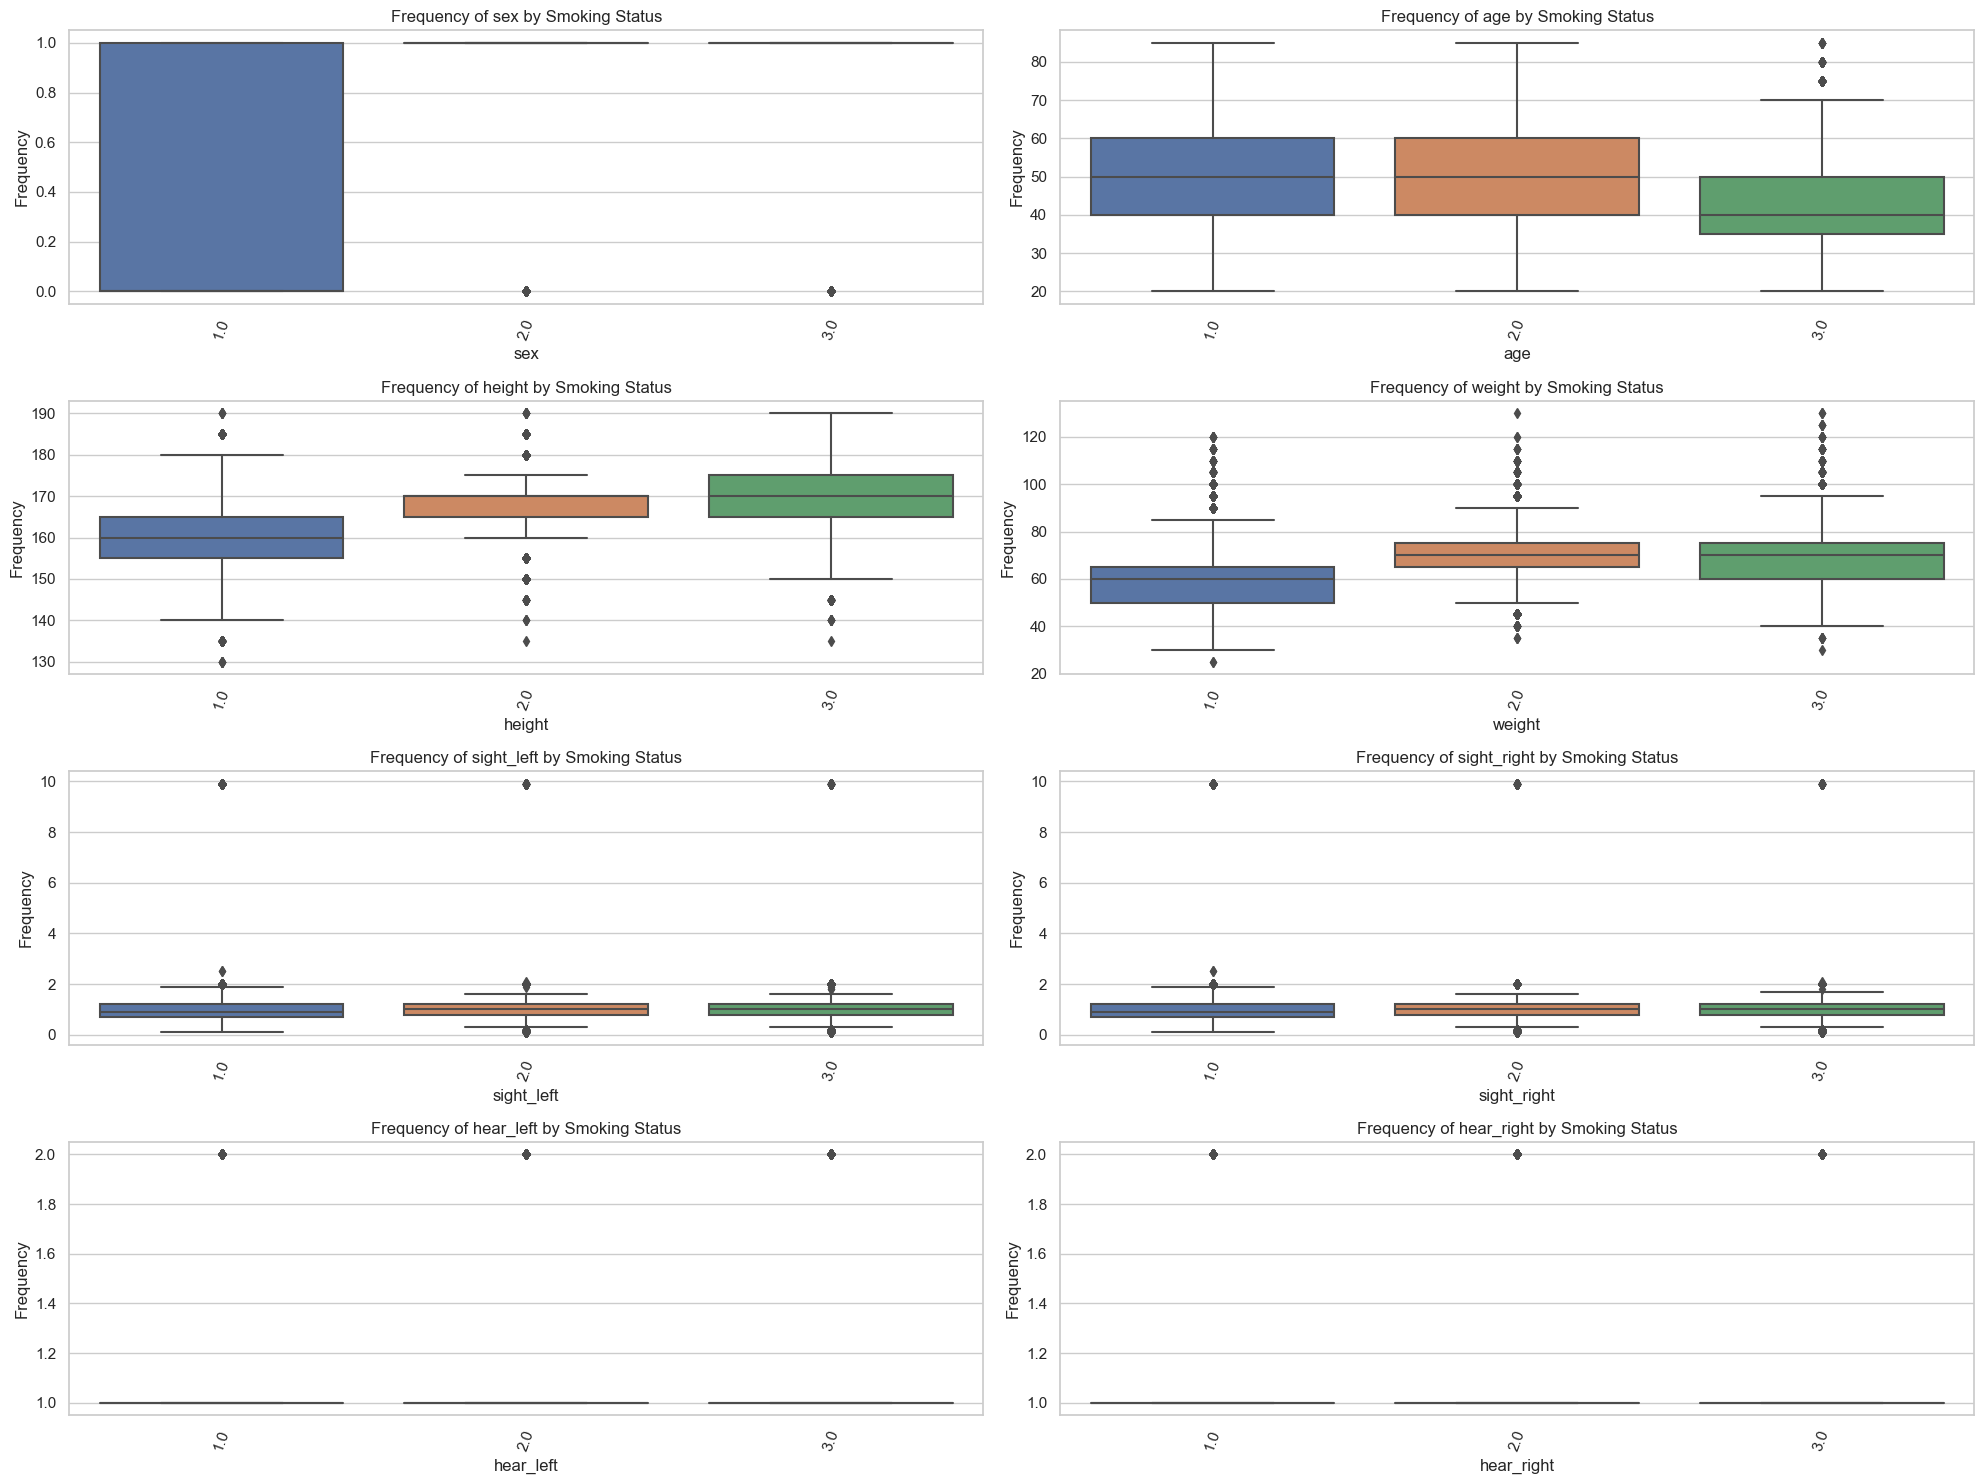

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left',
                              'sight_right', 'hear_left', 'hear_right'], start=1):
    print(f'Plotting {idx}...')
    print("Number of unique values : ",len(data[column].unique()))

    plt.subplot(4, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

#### ANALYZING, 'waistline' 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'

Plotting 1...
Number of item greater than 0.9995 percentile: 117.5
Number of values greater than 117.5 in DBP: 494
Number of rows removed: 494
Number of unique values :  664
Plotting 2...
Number of item greater than 0.9995 percentile: 190.0
Number of values greater than 190.0 in DBP: 465
Number of rows removed: 465
Number of unique values :  121
Plotting 3...
Number of item greater than 0.9995 percentile: 120.0
Number of values greater than 120.0 in DBP: 374
Number of rows removed: 374
Number of unique values :  88
Plotting 4...
Number of item greater than 0.9995 percentile: 354.0
Number of values greater than 354.0 in DBP: 491
Number of rows removed: 491
Number of unique values :  323
Plotting 5...
Number of item greater than 0.9995 percentile: 369.0
Number of values greater than 369.0 in DBP: 485
Number of rows removed: 485
Number of unique values :  315
Plotting 6...
Number of item greater than 0.9995 percentile: 129.0
Number of values greater than 129.0 in DBP: 470
Number of rows r

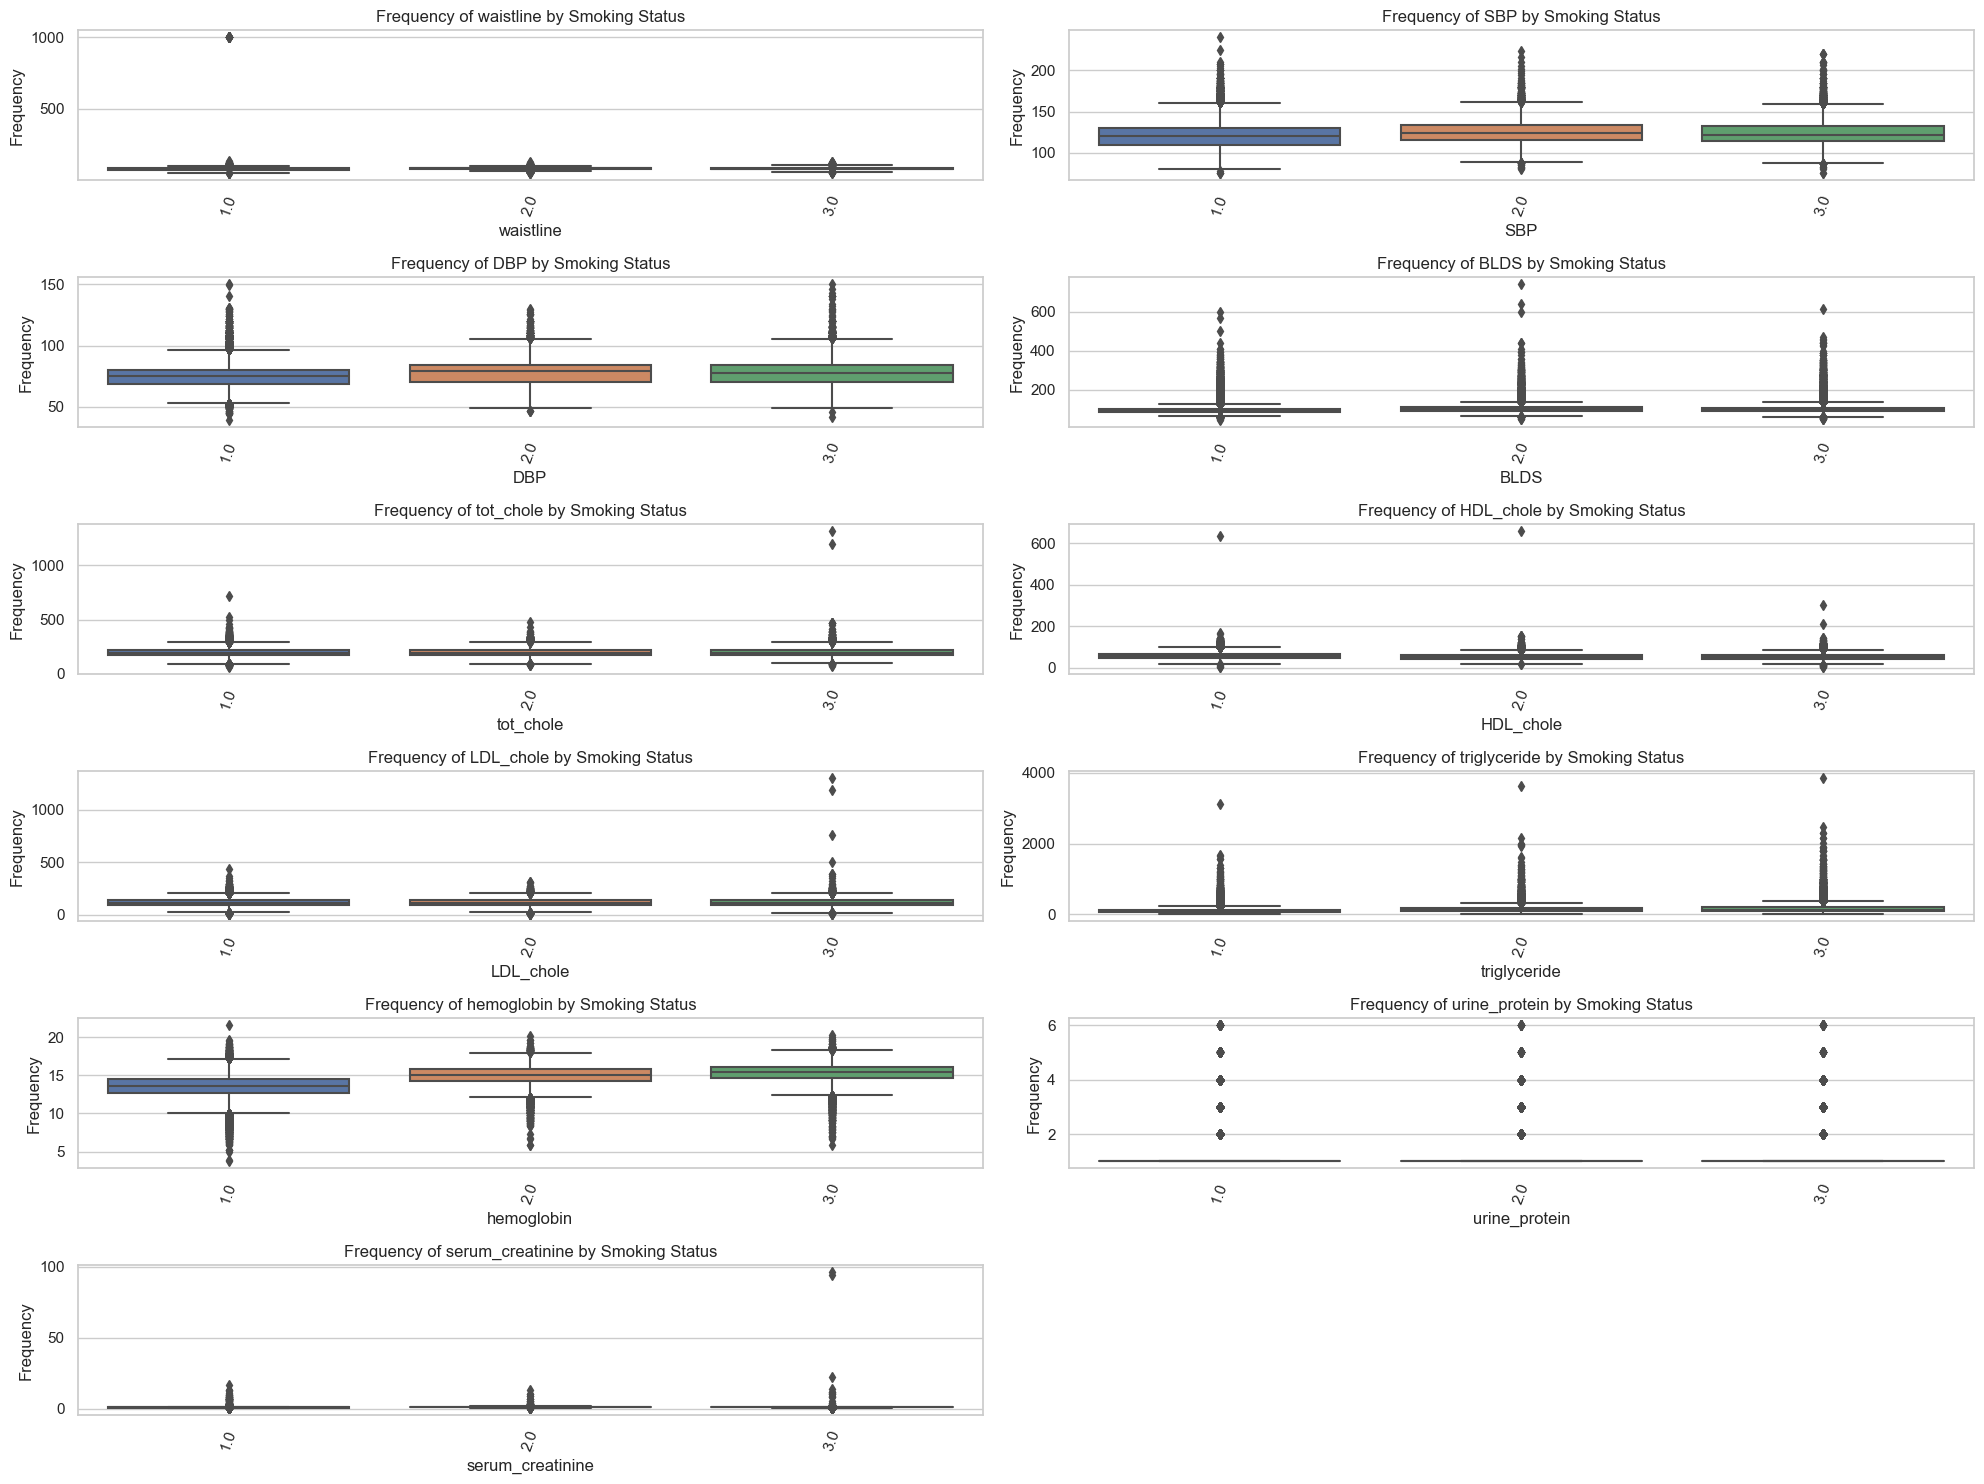

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    print(f'Plotting {idx}...')

    number = 0.9995
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(
        f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (
        data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')

    print("Number of unique values : ", len(data[column].unique()))

    plt.subplot(6, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

#### ANALYZING, SGOT_AST,	SGOT_ALT and gamma_GTP

Plotting 1...
Number of item greater than 0.9995 percentile: 275.9295000000857
Number of values greater than 275.9295000000857 in DBP: 494
Number of rows removed: 494
Number of unique values :  275
Plotting 2...
Number of item greater than 0.9995 percentile: 248.0
Number of values greater than 248.0 in DBP: 489
Number of rows removed: 489
Number of unique values :  248
Plotting 3...
Number of item greater than 0.9995 percentile: 793.4210000000894
Number of values greater than 793.4210000000894 in DBP: 493
Number of rows removed: 493
Number of unique values :  778


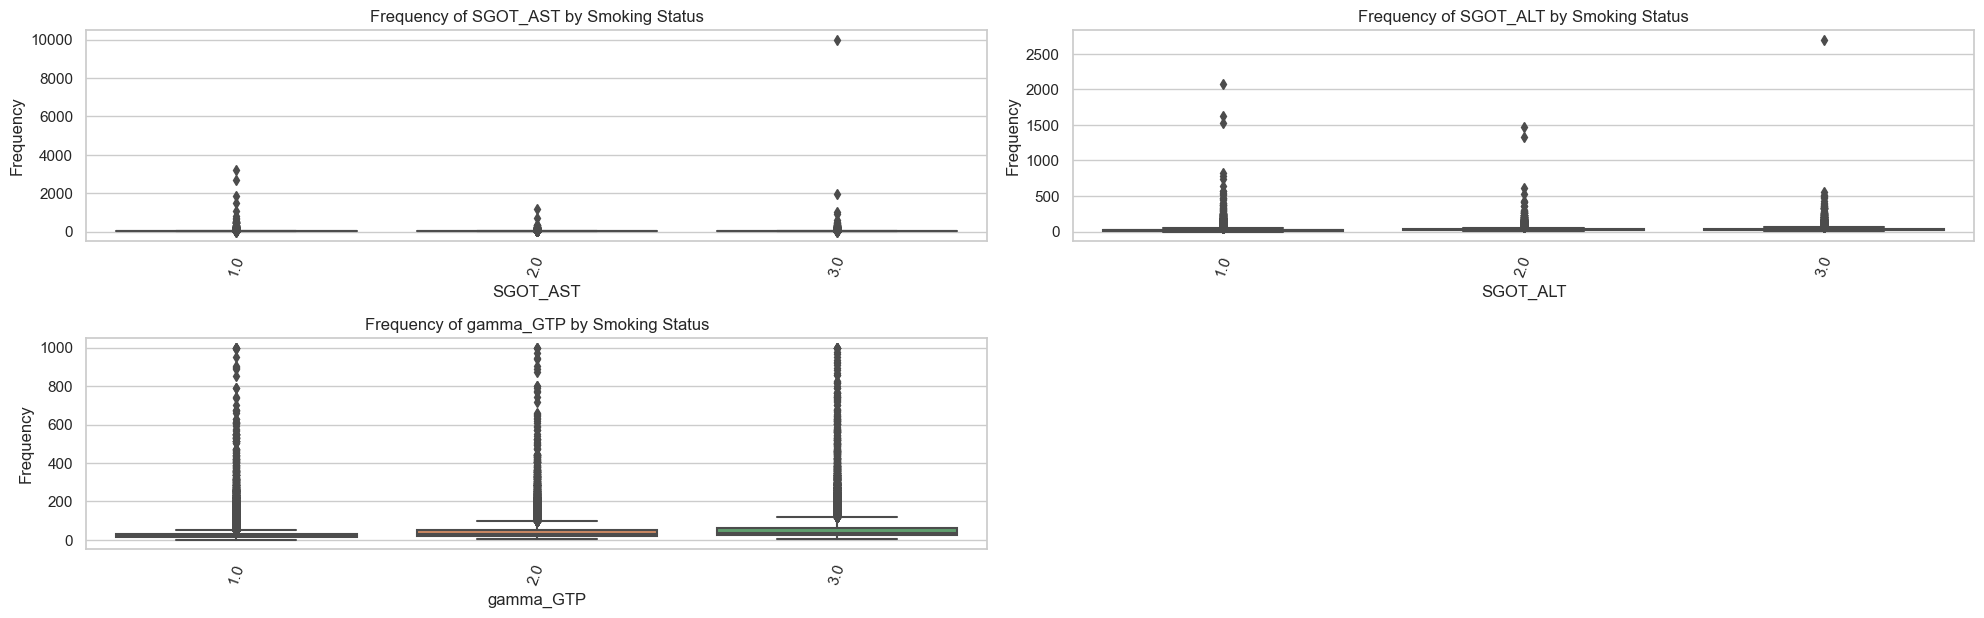

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')
    
    number = 0.9995
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')
    
    print("Number of unique values : ", len(data[column].unique()))

    plt.subplot(5, 2, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

### Mean, Std Dev and Median

In [277]:
data.shape

(984666, 24)

In [278]:
for idx, column in enumerate(['sex', 'age', 'height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")


1  ###########################################################################
Column: sex, Subset 1 - Mean: 0.2728, Std Dev: 0.4454, Median: 0.0000


Column: sex, Subset 2 - Mean: 0.9375, Std Dev: 0.2421, Median: 1.0000
Column: sex, Subset 3 - Mean: 0.9239, Std Dev: 0.2651, Median: 1.0000
2  ###########################################################################
Column: age, Subset 1 - Mean: 48.4486, Std Dev: 14.8300, Median: 50.0000
Column: age, Subset 2 - Mean: 50.1058, Std Dev: 12.9978, Median: 50.0000
Column: age, Subset 3 - Mean: 43.1927, Std Dev: 12.1641, Median: 40.0000
3  ###########################################################################
Column: height, Subset 1 - Mean: 158.5680, Std Dev: 8.6830, Median: 160.0000
Column: height, Subset 2 - Mean: 167.3843, Std Dev: 6.8672, Median: 170.0000
Column: height, Subset 3 - Mean: 168.3651, Std Dev: 7.1573, Median: 170.0000
4  ###########################################################################
Column: weight, Subset 1 - Mean: 59.2812, Std Dev: 11.3032, Median: 55.0000
Column: weight, Subset 2 - Mean: 69.3802, Std Dev: 10.8723, Median: 70.0000
Column: weight, Subse

In [279]:
for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  ###########################################################################
Column: SBP, Subset 1 - Mean: 121.1066, Std Dev: 14.7618, Median: 120.0000
Column: SBP, Subset 2 - Mean: 125.2476, Std Dev: 13.6149, Median: 125.0000
Column: SBP, Subset 3 - Mean: 123.4428, Std Dev: 13.4572, Median: 122.0000
2  ###########################################################################
Column: DBP, Subset 1 - Mean: 74.8735, Std Dev: 9.7215, Median: 75.0000
Column: DBP, Subset 2 - Mean: 78.0006, Std Dev: 9.5734, Median: 79.0000
Column: DBP, Subset 3 - Mean: 77.5146, Std Dev: 9.6613, Median: 78.0000
3  ###########################################################################
Column: BLDS, Subset 1 - Mean: 98.3249, Std Dev: 21.0341, Median: 94.0000
Column: BLDS, Subset 2 - Mean: 103.8744, Std Dev: 24.3734, Median: 99.0000
Column: BLDS, Subset 3 - Mean: 102.3811, Std Dev: 25.7601, Median: 97.0000
4  ###########################################################################
Column: tot_chole, 

In [280]:
for idx, column in enumerate(['SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    print(idx, " ###########################################################################")
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  ###########################################################################


Column: SGOT_AST, Subset 1 - Mean: 24.4001, Std Dev: 11.4653, Median: 22.0000
Column: SGOT_AST, Subset 2 - Mean: 27.7892, Std Dev: 13.6918, Median: 25.0000
Column: SGOT_AST, Subset 3 - Mean: 27.1303, Std Dev: 14.7229, Median: 24.0000
2  ###########################################################################
Column: SGOT_ALT, Subset 1 - Mean: 22.4810, Std Dev: 16.4875, Median: 18.0000
Column: SGOT_ALT, Subset 2 - Mean: 29.5064, Std Dev: 20.0932, Median: 24.0000
Column: SGOT_ALT, Subset 3 - Mean: 29.8514, Std Dev: 21.3252, Median: 24.0000
3  ###########################################################################
Column: gamma_GTP, Subset 1 - Mean: 27.0411, Std Dev: 30.9743, Median: 19.0000
Column: gamma_GTP, Subset 2 - Mean: 46.0415, Std Dev: 50.2590, Median: 31.0000
Column: gamma_GTP, Subset 3 - Mean: 54.4099, Std Dev: 61.0832, Median: 36.0000


### countplot by hue

1
2
3
4
5
6
7
8
9


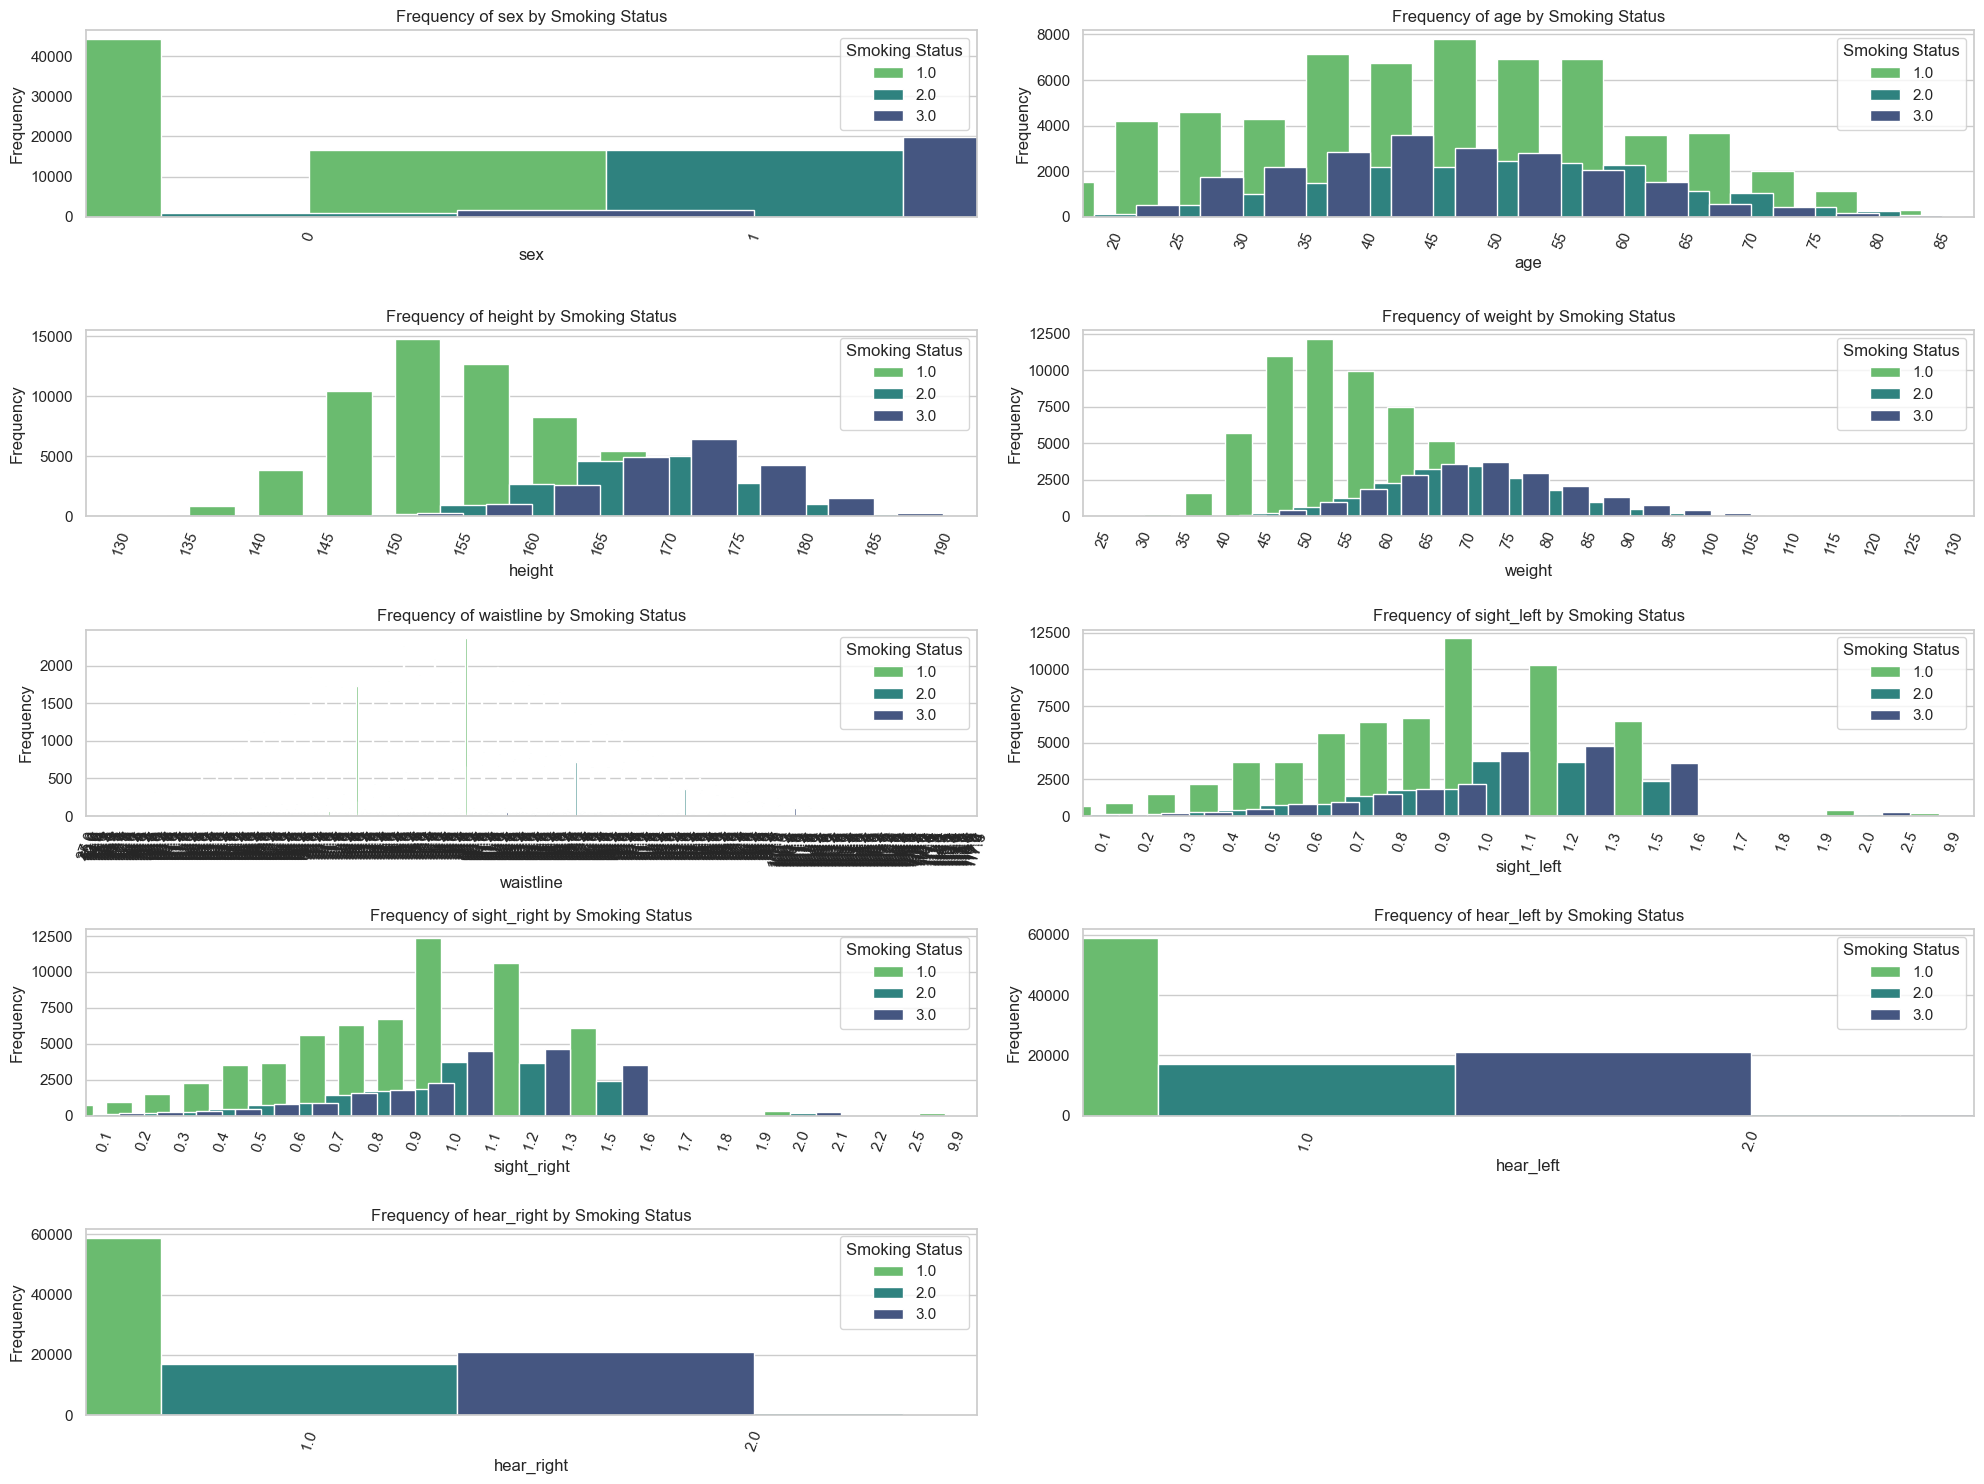

In [281]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'height', 'weight','waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
    plt.subplot(5, 2, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

1
2
3
4
5
6
7
8
9
10


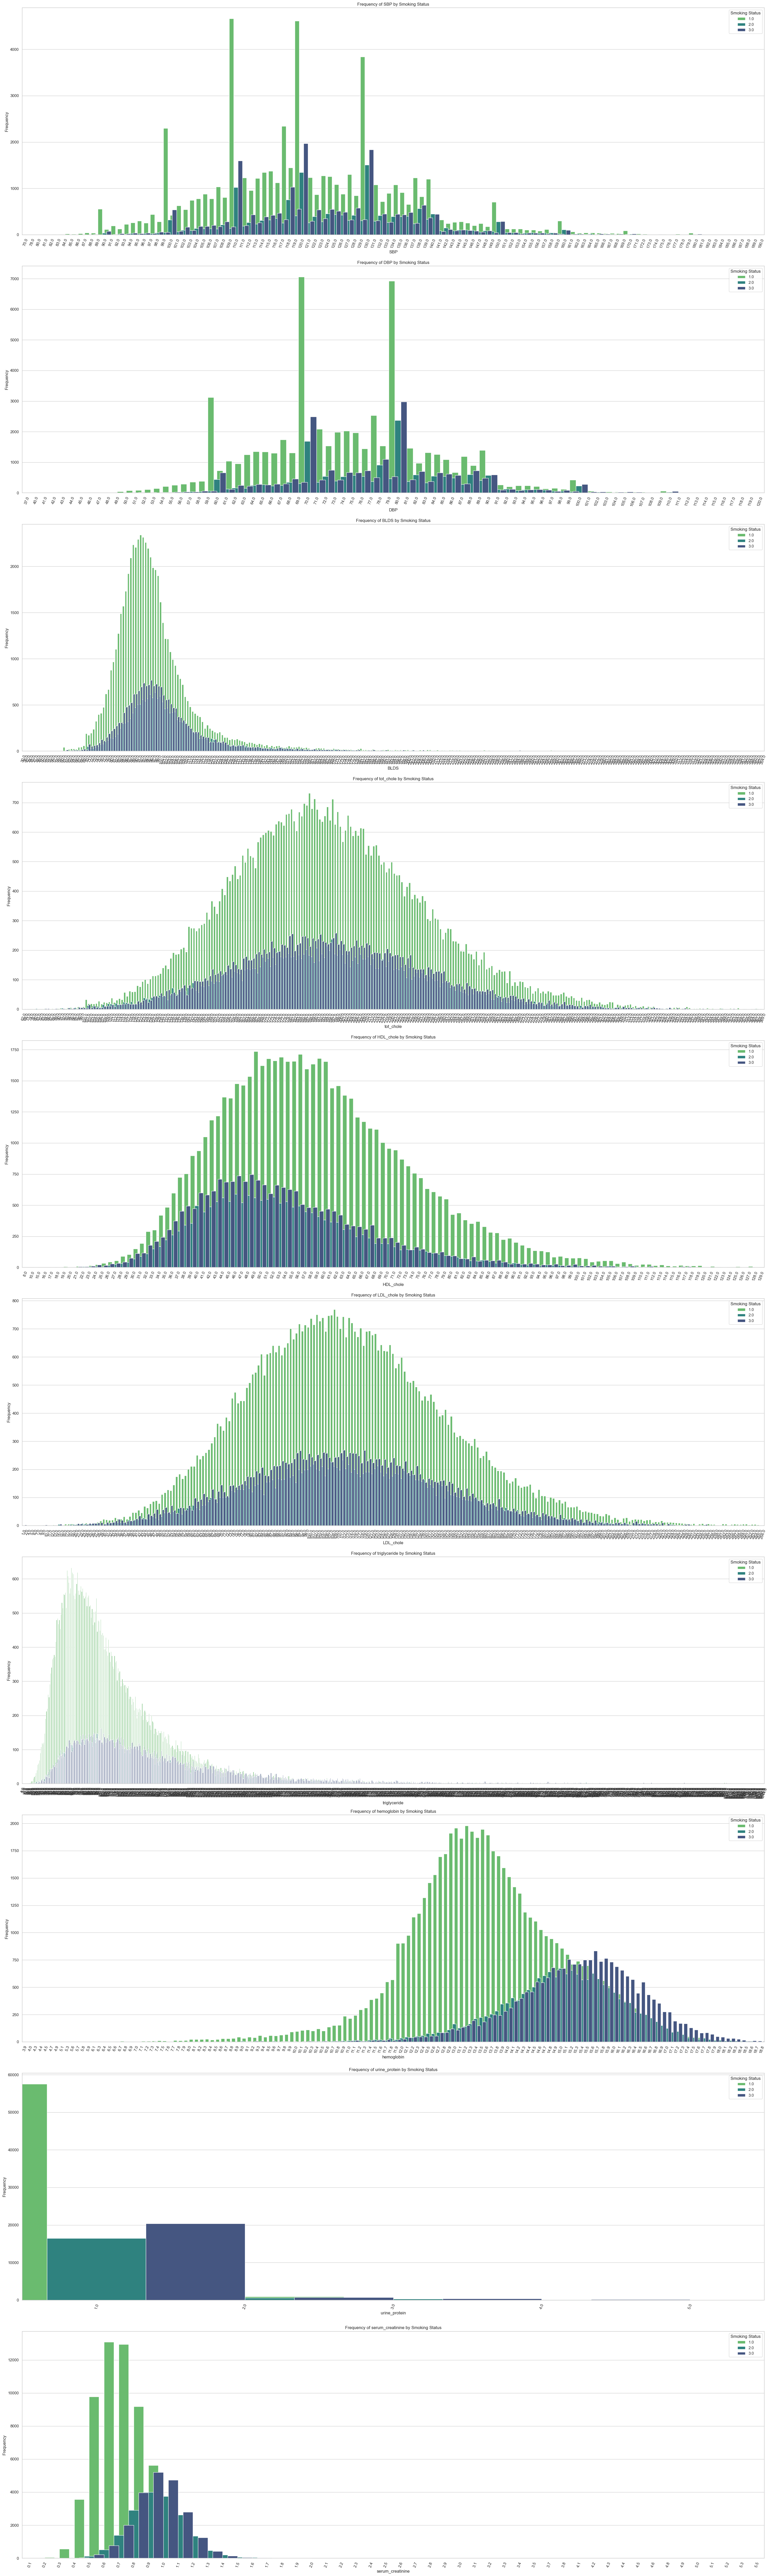

In [282]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 100))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'], start=1):
    plt.subplot(10, 1, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

1
2
3


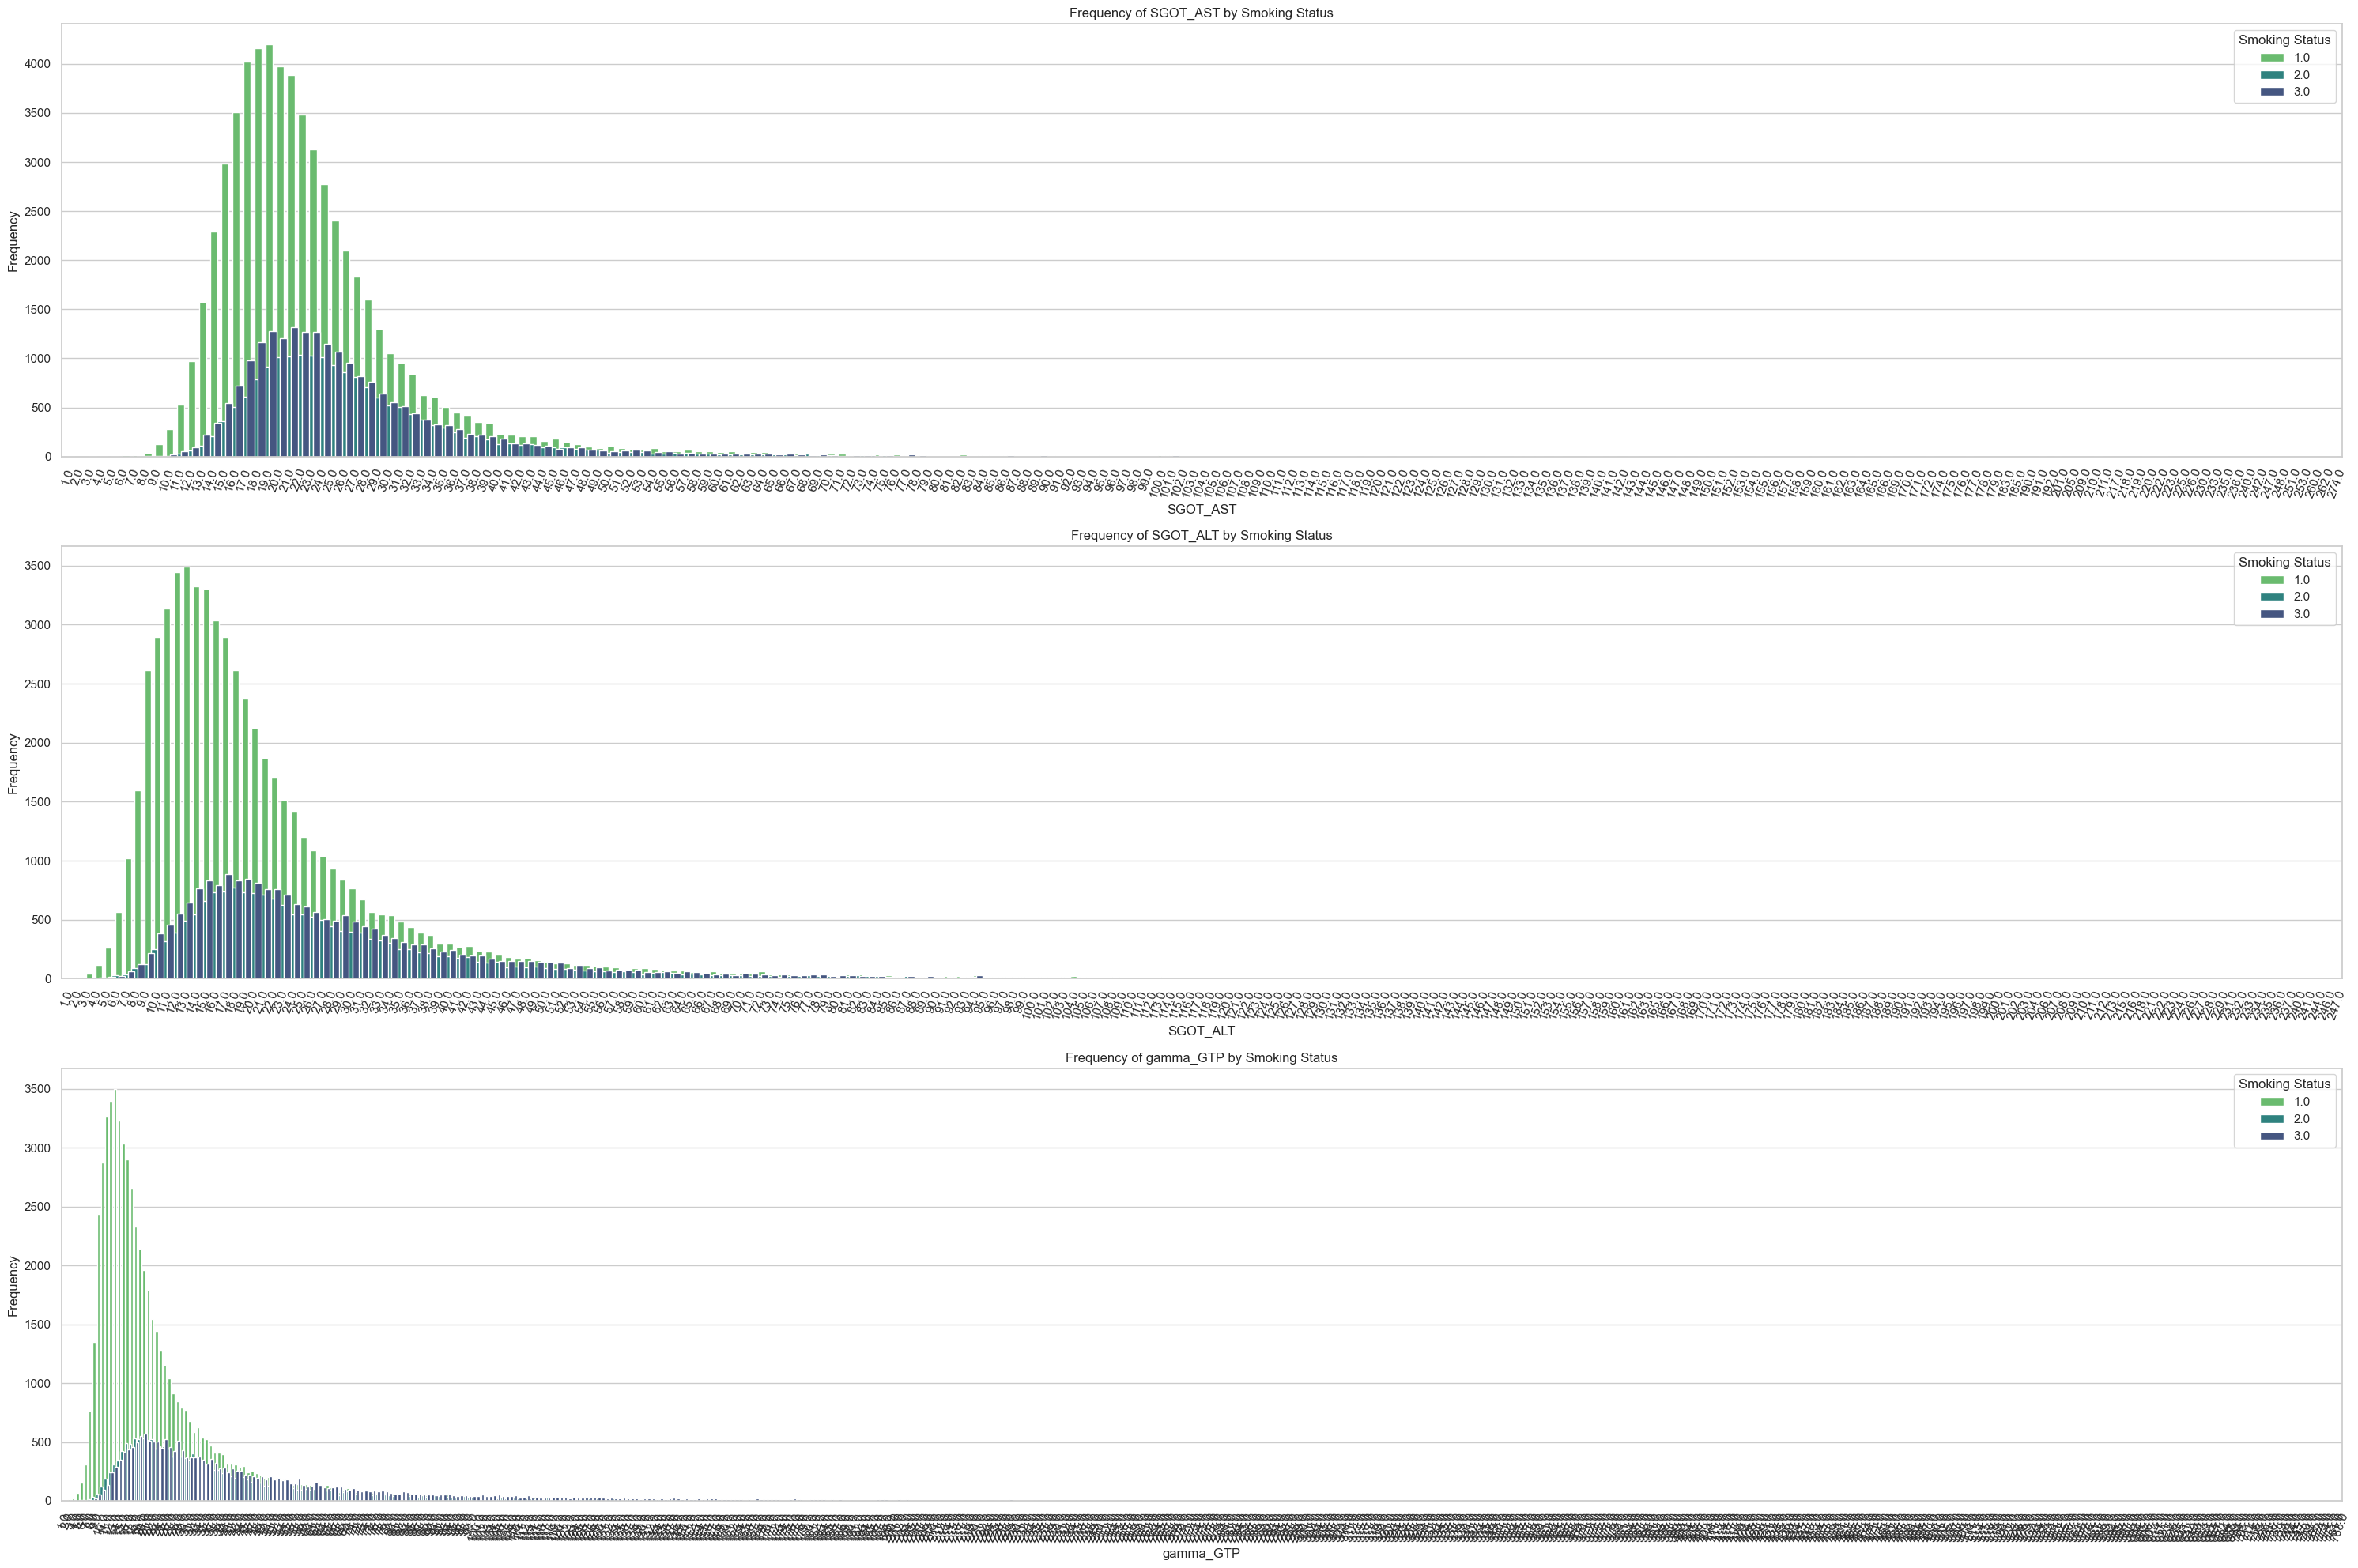

In [283]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 20))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    plt.subplot(3, 1, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

### Heatmap

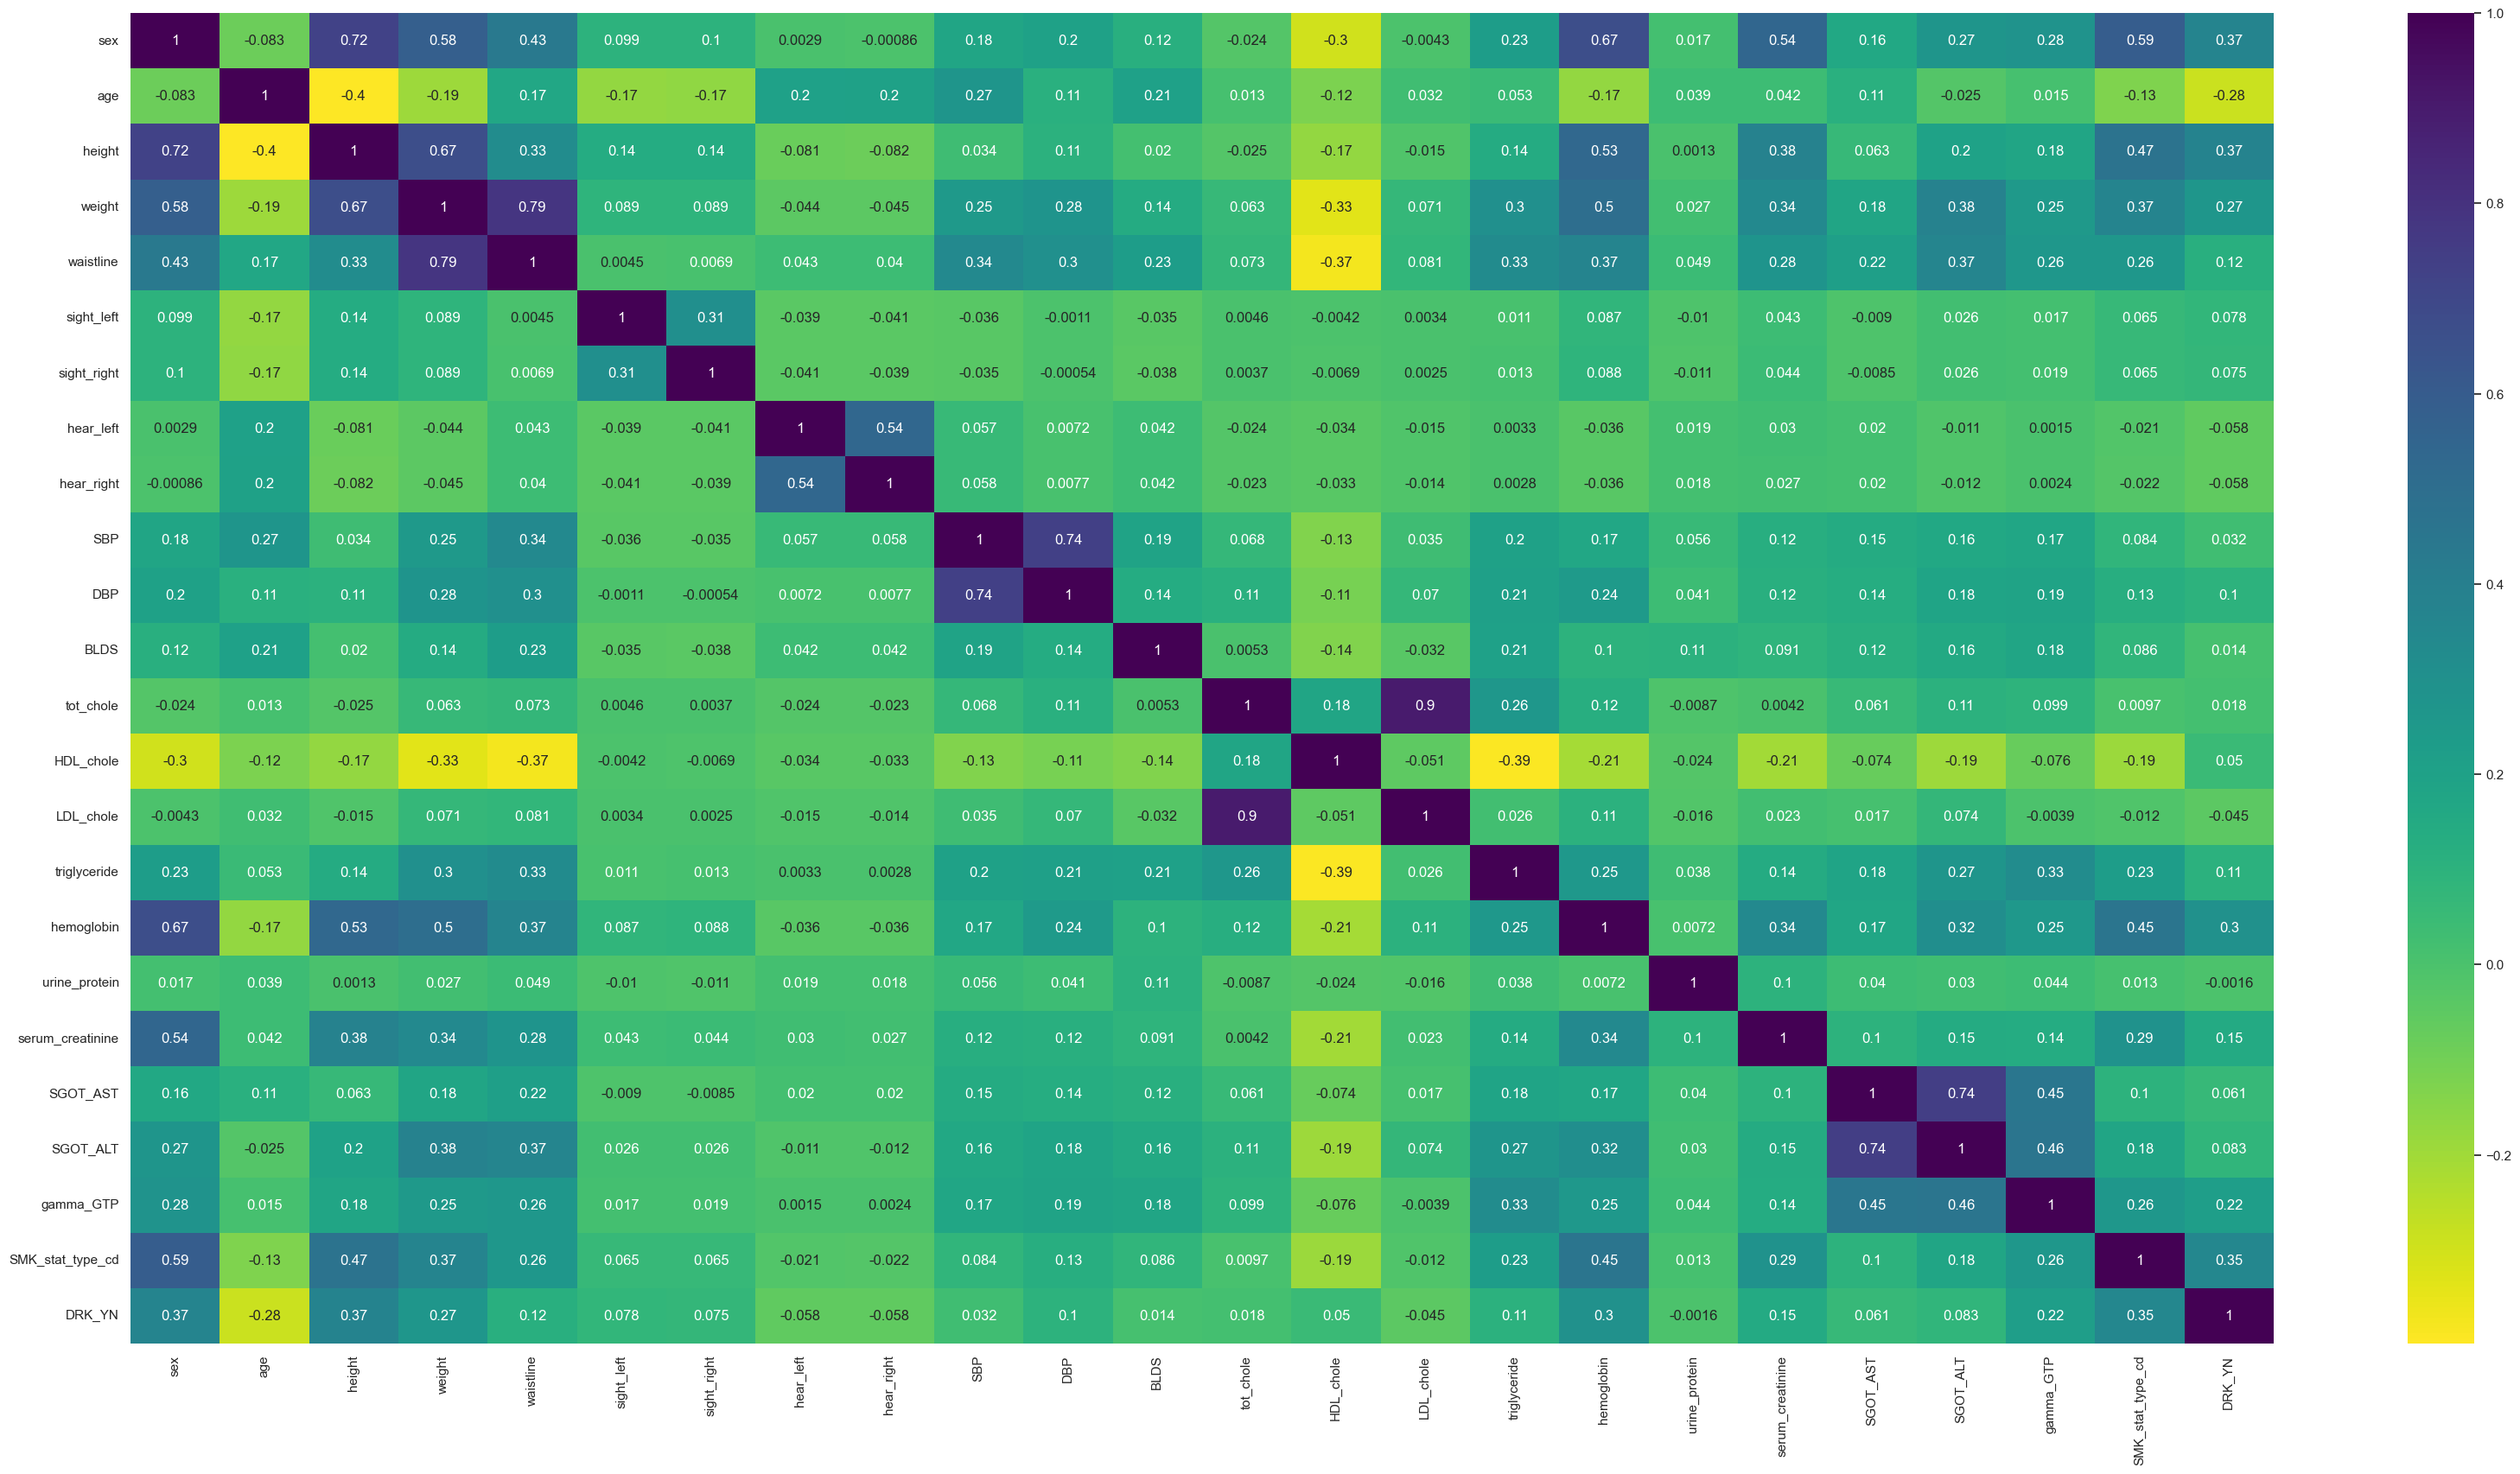

In [284]:
def heatmap():
    plt.figure(figsize=(40, 20))
    sns.heatmap(data.corr(), annot=True, cmap='viridis_r')
    plt.show()
heatmap()

### Pair Plots

In [285]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       1  
1               0.9      20.0      36.0       27.0               3.0       0  
2               0.9      47.0      32.0       68.0               1.0       0  
3               1.1      29.0      34.0       18.0               1.0       0  
4               0.8      19.0      12.0       25.0               1.0       0  

[5 rows x 24 columns]

In [286]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [287]:
def pairplot(data):
    print(data.head())
    sns.pairplot(data=data, hue=current_y_is_smoking_or_drinking, markers=["o", "s"])
    plt.show()

#### Pair Plots betwween age , height , weight , waistline

        age  height  weight  waistline  SMK_stat_type_cd
250147   50     170      70       82.0               1.0
793099   75     160      55       73.0               1.0
40606    30     165      60       79.0               1.0
883554   45     150      50       70.0               1.0
956057   40     165      60       82.0               1.0


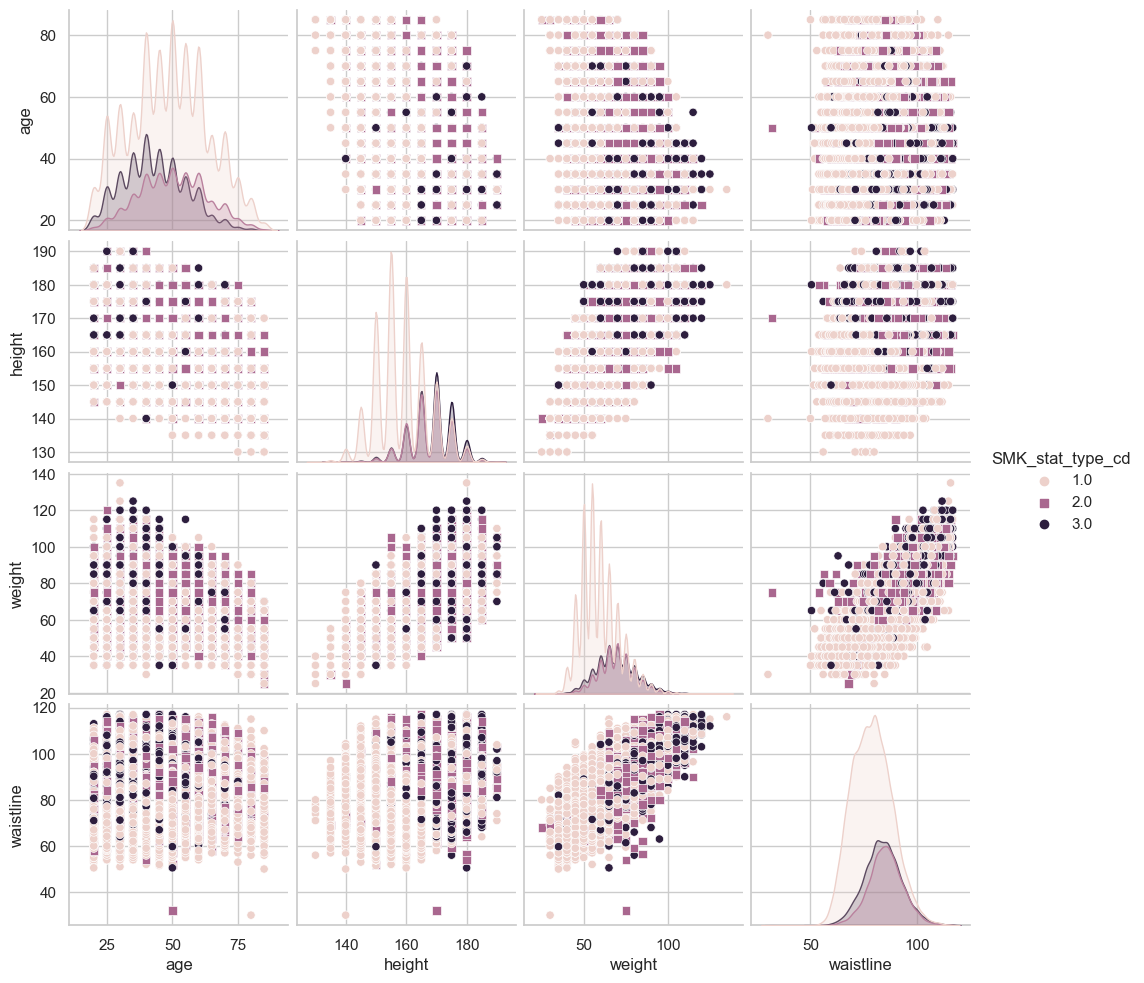

In [288]:
data_changed = {
    'age': data["age"], 'height': data["height"], 'weight': data["weight"], 'waistline': data["waistline"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween sight_left, sight_right, hear_left, hear_right

        sight_left  sight_right  hear_left  hear_right  SMK_stat_type_cd
340640         1.5          1.5        1.0         1.0               3.0
103850         0.9          1.0        1.0         1.0               1.0
508211         1.0          1.0        1.0         1.0               1.0
855270         1.5          1.5        1.0         1.0               1.0
181439         0.7          0.5        1.0         1.0               1.0


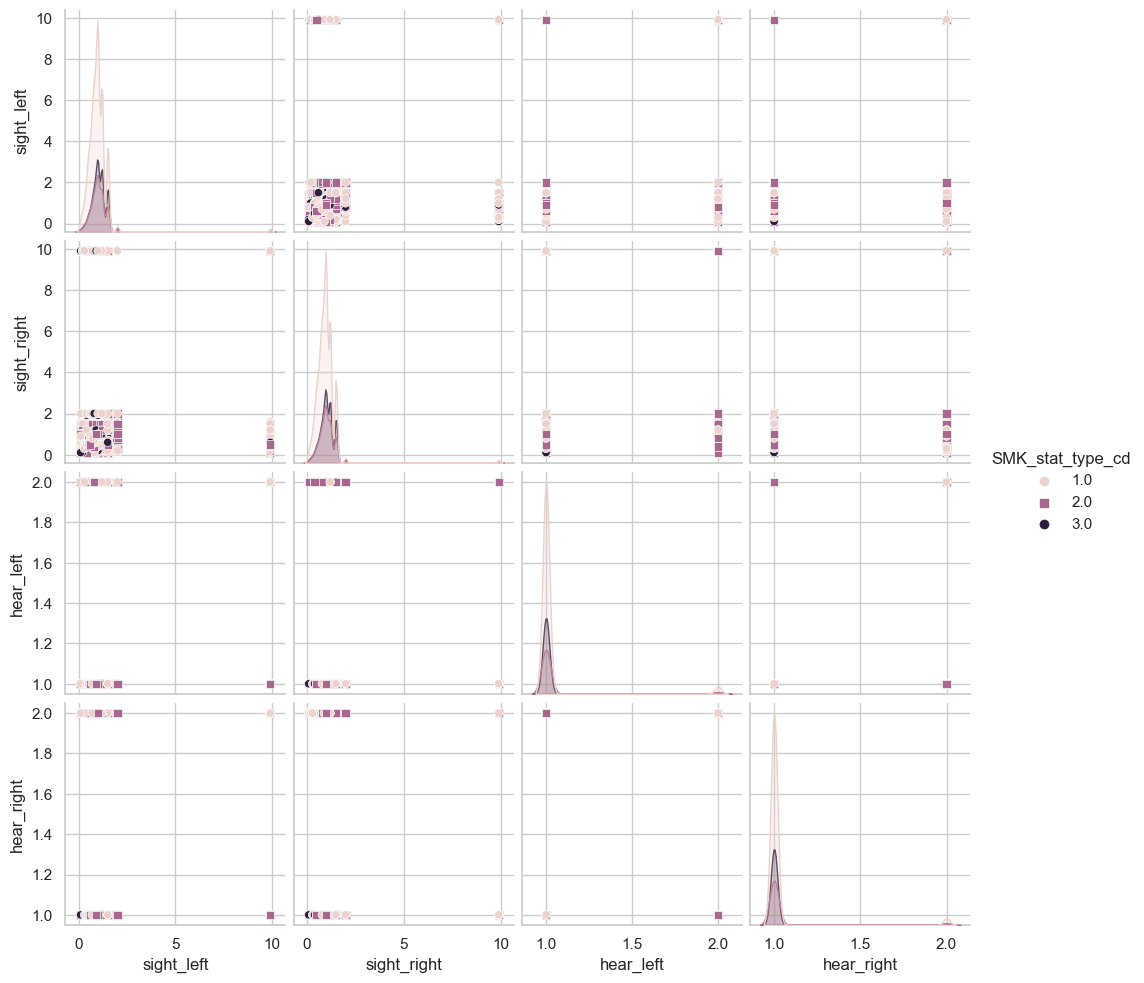

In [289]:
data_changed = {
    'sight_left': data["sight_left"], 'sight_right': data["sight_right"], 'hear_left': data["hear_left"], "hear_right": data["hear_right"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between sbp, sbp and blds 

          SBP   DBP  BLDS  SMK_stat_type_cd
613053  136.0  80.0  95.0               1.0
316999  126.0  76.0  80.0               1.0
202911  100.0  70.0  98.0               1.0
9040    120.0  80.0  78.0               1.0
39326   109.0  60.0  90.0               1.0


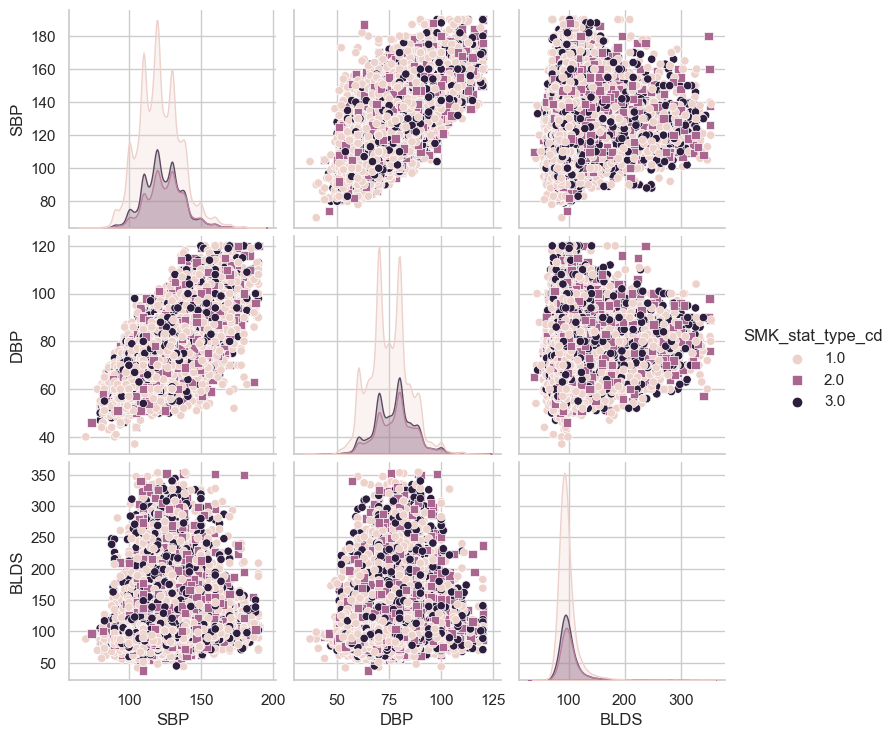

In [290]:
data_changed = {
    'SBP': data["SBP"], 'DBP': data["DBP"], 'BLDS': data["BLDS"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between tot_chole, HDL_chole and LDL_chole 

        tot_chole  HDL_chole  LDL_chole  SMK_stat_type_cd
100481      193.0       43.0      123.0               1.0
408876      177.0       40.0       81.0               1.0
127159      224.0       63.0      142.0               1.0
324747      222.0       68.0      133.0               1.0
464640      145.0       49.0       78.0               3.0


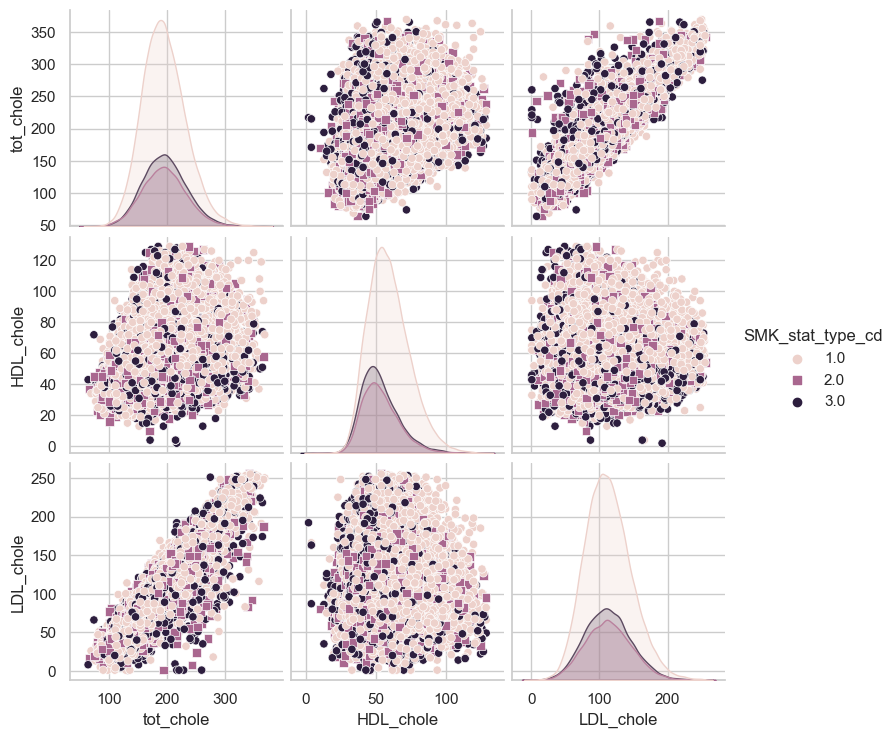

In [291]:
data_changed = {
    'tot_chole': data["tot_chole"], 'HDL_chole': data["HDL_chole"], 'LDL_chole': data["LDL_chole"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between triglyceride, hemoglobin, urine_protein and serum_creatinine

        triglyceride  hemoglobin  urine_protein  serum_creatinine  \
186920          94.0        16.7            1.0               0.7   
870508          54.0        13.1            1.0               0.9   
38465          139.0        16.1            1.0               0.9   
310489         255.0        18.0            1.0               1.1   
262614         134.0        15.0            1.0               0.9   

        SMK_stat_type_cd  
186920               1.0  
870508               2.0  
38465                3.0  
310489               3.0  
262614               1.0  


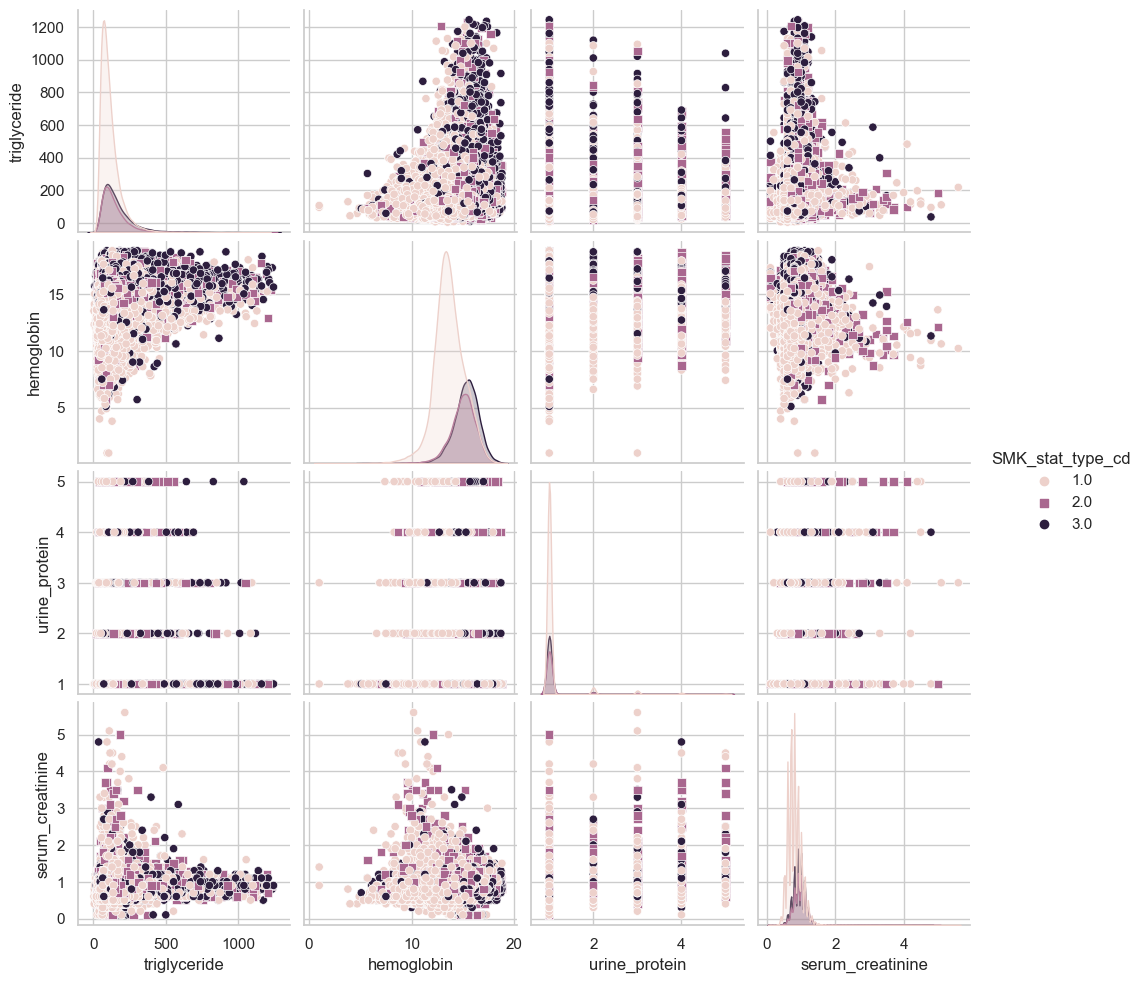

In [292]:
data_changed = {
    'triglyceride': data["triglyceride"], 'hemoglobin': data["hemoglobin"], 'urine_protein': data["urine_protein"], 'serum_creatinine': data["serum_creatinine"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'

        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd
874701      16.0      18.0       39.0               3.0
694265      28.0      17.0       22.0               3.0
506714      26.0      17.0       24.0               1.0
909790      28.0      15.0       19.0               1.0
520772      29.0      28.0       22.0               1.0


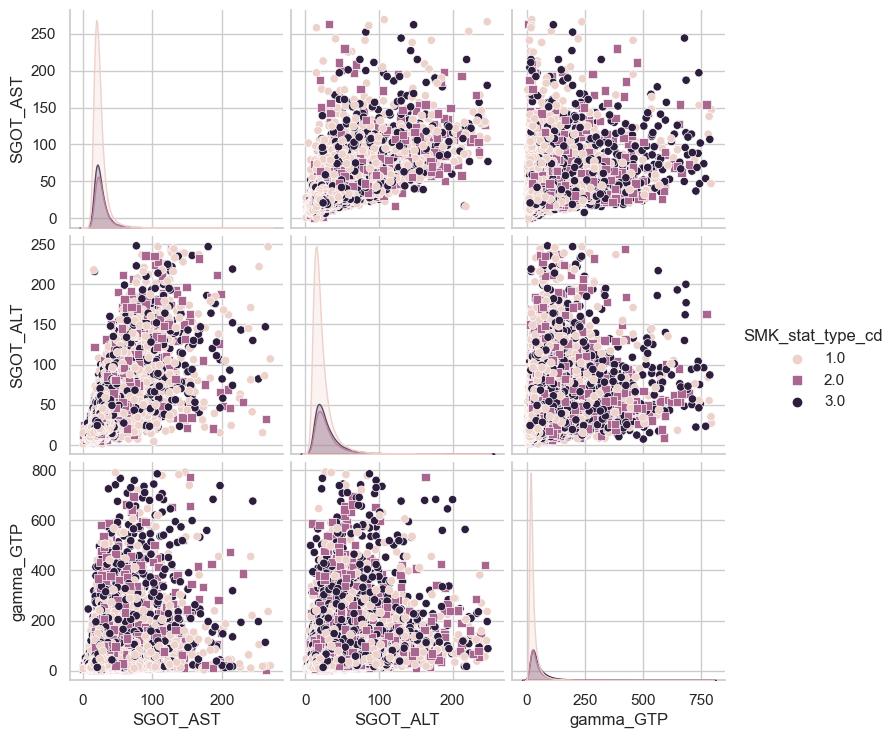

In [293]:
data_changed = {
    'SGOT_AST': data["SGOT_AST"], 'SGOT_ALT': data["SGOT_ALT"], 'gamma_GTP': data["gamma_GTP"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

### Dimensionality Reduction

In [294]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [295]:
from sklearn.decomposition import PCA
def workinginpca(data):
    pca = PCA(n_components=1)

    pca_result = pca.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Display the result
    print(f"Explained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_loss = 1 - explained_variance_ratio[0]
    print(f"Data Lost: {data_loss:.2%}")

In [296]:
from sklearn.decomposition import TruncatedSVD
def workinginsvd(data):
    svd = TruncatedSVD(n_components=1)

    transformed_data =  svd.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    print(f"Explained Variance Ratio: {explained_variance_ratio[0]:.2%}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]
    print(f"Data Lost: {data_lost:.2%}")

In [297]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def workinginlda(data , target):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(data, target)

    # Calculate the explained variance ratio
    explained_variance_ratio = lda.explained_variance_ratio_

    # Calculate the proportion of data retained
    data_retained = np.sum(explained_variance_ratio)

    print(f"Explained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]

    print(f"Proportion of Data Retained: {data_retained:.2%}")
    print(f"Proportion of Data lost: {data_lost:.2%}")

#### Working in 'height', 'weight', 'waistline'

In [298]:
workinginpca(data[['height', 'weight', 'waistline']])

Explained Variance Ratio: 0.78
Data Lost: 22.03%


In [299]:
workinginsvd(data[['height', 'weight', 'waistline']])

Explained Variance Ratio: 55.60%
Data Lost: 44.40%


In [300]:
workinginlda(data[['height', 'weight', 'waistline']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 0.99
Proportion of Data Retained: 98.90%
Proportion of Data lost: 1.10%


In [301]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_h_w_wa'] = lda.fit_transform(data[['height', 'weight', 'waistline']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   

   hear_right    SBP  ...  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...          92.0        17.1            1.0   
1         1.0  130.0  ...         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  
0             1.162151  
1             2.219764  

[2 rows x 25 columns]

In [302]:
data.drop(['height', 'weight', 'waistline'], axis=1, inplace=True)
data.head(2)

sex  age  sight_left  sight_right  hear_left  hear_right    SBP   DBP  \
0    1   35         1.0          1.0        1.0         1.0  120.0  80.0   
1    1   30         0.9          1.2        1.0         1.0  130.0  82.0   

    BLDS  tot_chole  ...  triglyceride  hemoglobin  urine_protein  \
0   99.0      193.0  ...          92.0        17.1            1.0   
1  106.0      228.0  ...         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  
0             1.162151  
1             2.219764  

[2 rows x 22 columns]

#### working 'sight_left', 'sight_right'

In [303]:
workinginpca(data[['sight_left', 'sight_right']])

Explained Variance Ratio: 0.65
Data Lost: 34.62%


In [304]:
workinginsvd(data[['sight_left', 'sight_right']])

Explained Variance Ratio: 65.38%
Data Lost: 34.62%


In [305]:
workinginlda(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 1.00
Proportion of Data Retained: 99.98%
Proportion of Data lost: 0.02%


In [306]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_l_r'] = lda.fit_transform(data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age  sight_left  sight_right  hear_left  hear_right    SBP   DBP  \
0    1   35         1.0          1.0        1.0         1.0  120.0  80.0   
1    1   30         0.9          1.2        1.0         1.0  130.0  82.0   

    BLDS  tot_chole  ...  hemoglobin  urine_protein  serum_creatinine  \
0   99.0      193.0  ...        17.1            1.0               1.0   
1  106.0      228.0  ...        15.8            1.0               0.9   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0      21.0      35.0       40.0               1.0       1   
1      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  LDA_combined_sight_l_r  
0             1.162151                0.041824  
1             2.219764                0.150311  

[2 rows x 23 columns]

In [307]:
data.drop(['sight_left', 'sight_right'], axis=1, inplace=True)
data.head(2)

sex  age  hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0    1   35        1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1    1   30        1.0         1.0  130.0  82.0  106.0      228.0       55.0   

   LDL_chole  ...  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0      126.0  ...        17.1            1.0               1.0      21.0   
1      148.0  ...        15.8            1.0               0.9      20.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0      35.0       40.0               1.0       1             1.162151   
1      36.0       27.0               3.0       0             2.219764   

   LDA_combined_sight_l_r  
0                0.041824  
1                0.150311  

[2 rows x 21 columns]

#### working 'hear_left', 'hear_right'

In [308]:
workinginpca(data[['hear_left', 'hear_right']])

Explained Variance Ratio: 0.77
Data Lost: 23.16%


In [309]:
workinginsvd(data[['hear_left', 'hear_right']])

Explained Variance Ratio: 76.83%
Data Lost: 23.17%


In [310]:
workinginlda(data[['hear_left', 'hear_right']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 0.99
Proportion of Data Retained: 99.14%
Proportion of Data lost: 0.86%


In [311]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_h_l_r'] = lda.fit_transform(data[['hear_left', 'hear_right']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age  hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0    1   35        1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1    1   30        1.0         1.0  130.0  82.0  106.0      228.0       55.0   

   LDL_chole  ...  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0      126.0  ...            1.0               1.0      21.0      35.0   
1      148.0  ...            1.0               0.9      20.0      36.0   

   gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0       40.0               1.0       1             1.162151   
1       27.0               3.0       0             2.219764   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  
0                0.041824                  0.203928  
1                0.150311                  0.203928  

[2 rows x 22 columns]

In [312]:
data.drop(['hear_left', 'hear_right'], axis=1, inplace=True)
data.head(2)

sex  age    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0    1   35  120.0  80.0   99.0      193.0       48.0      126.0   
1    1   30  130.0  82.0  106.0      228.0       55.0      148.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0          92.0        17.1            1.0               1.0      21.0   
1         121.0        15.8            1.0               0.9      20.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0      35.0       40.0               1.0       1             1.162151   
1      36.0       27.0               3.0       0             2.219764   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  
0                0.041824                  0.203928  
1                0.150311                  0.203928

#### working in SBP AND BLDS


In [313]:
workinginpca(data[['SBP', 'BLDS']])

Explained Variance Ratio: 0.73
Data Lost: 26.76%


In [314]:
workinginsvd(data[['SBP', 'BLDS']])

Explained Variance Ratio: 54.40%
Data Lost: 45.60%


In [315]:
workinginlda(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 0.99
Proportion of Data Retained: 99.19%
Proportion of Data lost: 0.81%


In [316]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sbp_blds'] = lda.fit_transform(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0    1   35  120.0  80.0   99.0      193.0       48.0      126.0   
1    1   30  130.0  82.0  106.0      228.0       55.0      148.0   

   triglyceride  hemoglobin  ...  serum_creatinine  SGOT_AST  SGOT_ALT  \
0          92.0        17.1  ...               1.0      21.0      35.0   
1         121.0        15.8  ...               0.9      20.0      36.0   

   gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0       40.0               1.0       1             1.162151   
1       27.0               3.0       0             2.219764   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  
0                0.041824                  0.203928              -0.145239  
1                0.150311                  0.203928               0.528178  

[2 rows x 21 columns]

In [317]:
data.drop(['SBP', 'BLDS'], axis=1, inplace=True)
data.head(2)

sex  age   DBP  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0    1   35  80.0      193.0       48.0      126.0          92.0        17.1   
1    1   30  82.0      228.0       55.0      148.0         121.0        15.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            1.0               1.0      21.0      35.0       40.0   
1            1.0               0.9      20.0      36.0       27.0   

   SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  LDA_combined_sight_l_r  \
0               1.0       1             1.162151                0.041824   
1               3.0       0             2.219764                0.150311   

   LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  
0                  0.203928              -0.145239  
1                  0.203928               0.528178

#### working in tot_chole, LDL_chole

In [318]:
workinginpca(data[['tot_chole', 'LDL_chole']])

Explained Variance Ratio: 0.95
Data Lost: 5.13%


In [319]:
workinginsvd(data[['tot_chole', 'LDL_chole']])

Explained Variance Ratio: 91.35%
Data Lost: 8.65%


In [320]:
workinginlda(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 0.99
Proportion of Data Retained: 99.24%
Proportion of Data lost: 0.76%


In [321]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_tot_chole_LDL_chole'] = lda.fit_transform(data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age   DBP  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0    1   35  80.0      193.0       48.0      126.0          92.0        17.1   
1    1   30  82.0      228.0       55.0      148.0         121.0        15.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0            1.0               1.0      21.0      35.0       40.0   
1            1.0               0.9      20.0      36.0       27.0   

   SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  LDA_combined_sight_l_r  \
0               1.0       1             1.162151                0.041824   
1               3.0       0             2.219764                0.150311   

   LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  \
0                  0.203928              -0.145239   
1                  0.203928               0.528178   

   LDA_combined_tot_chole_LDL_chole  
0                         -0.974981  
1                         -0.331648

In [322]:
data.drop(['tot_chole', 'LDL_chole'], axis=1, inplace=True)
data.head(2)

sex  age   DBP  HDL_chole  triglyceride  hemoglobin  urine_protein  \
0    1   35  80.0       48.0          92.0        17.1            1.0   
1    1   30  82.0       55.0         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  \
0             1.162151                0.041824                  0.203928   
1             2.219764                0.150311                  0.203928   

   LDA_combined_sbp_blds  LDA_combined_tot_chole_LDL_chole  
0              -0.145239                         -0.974981  
1               0.528178                         -0.331648

#### working in SGOT_AST and SGOT_ALT

In [323]:
workinginpca(data[['SGOT_AST', 'SGOT_ALT']])

Explained Variance Ratio: 0.89
Data Lost: 10.87%


In [324]:
workinginsvd(data[['SGOT_AST', 'SGOT_ALT']])

Explained Variance Ratio: 86.34%
Data Lost: 13.66%


In [325]:
workinginlda(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

Explained Variance Ratio: 0.98
Proportion of Data Retained: 97.90%
Proportion of Data lost: 2.10%


In [326]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_SGOT_AST_SGOT_ALT'] = lda.fit_transform(data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

data.head(2)

sex  age   DBP  HDL_chole  triglyceride  hemoglobin  urine_protein  \
0    1   35  80.0       48.0          92.0        17.1            1.0   
1    1   30  82.0       55.0         121.0        15.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0      21.0      35.0       40.0               1.0       1   
1               0.9      20.0      36.0       27.0               3.0       0   

   LDA_combined_h_w_wa  LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  \
0             1.162151                0.041824                  0.203928   
1             2.219764                0.150311                  0.203928   

   LDA_combined_sbp_blds  LDA_combined_tot_chole_LDL_chole  \
0              -0.145239                         -0.974981   
1               0.528178                         -0.331648   

   LDA_combined_SGOT_AST_SGOT_ALT  
0                        0.747447  
1                        0.837136

In [327]:
data.drop(['SGOT_AST', 'SGOT_ALT'], axis=1, inplace=True)
data.head(2)

sex  age   DBP  HDL_chole  triglyceride  hemoglobin  urine_protein  \
0    1   35  80.0       48.0          92.0        17.1            1.0   
1    1   30  82.0       55.0         121.0        15.8            1.0   

   serum_creatinine  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_h_w_wa  \
0               1.0       40.0               1.0       1             1.162151   
1               0.9       27.0               3.0       0             2.219764   

   LDA_combined_sight_l_r  LDA_combined_sight_h_l_r  LDA_combined_sbp_blds  \
0                0.041824                  0.203928              -0.145239   
1                0.150311                  0.203928               0.528178   

   LDA_combined_tot_chole_LDL_chole  LDA_combined_SGOT_AST_SGOT_ALT  
0                         -0.974981                        0.747447  
1                         -0.331648                        0.837136

### REGRESSION MODELS 

In [328]:
data.columns

Index(['sex', 'age', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'gamma_GTP', 'SMK_stat_type_cd',
       'DRK_YN', 'LDA_combined_h_w_wa', 'LDA_combined_sight_l_r',
       'LDA_combined_sight_h_l_r', 'LDA_combined_sbp_blds',
       'LDA_combined_tot_chole_LDL_chole', 'LDA_combined_SGOT_AST_SGOT_ALT'],
      dtype='object')

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [330]:
X = data[['sex', 'age', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin',
          'urine_protein', 'serum_creatinine', 'LDA_combined_SGOT_AST_SGOT_ALT', 'gamma_GTP', 'LDA_combined_h_w_wa',
          'LDA_combined_sight_l_r', 'LDA_combined_sight_h_l_r',
          'LDA_combined_sbp_blds', 'LDA_combined_tot_chole_LDL_chole']]


y = data[current_y_is_smoking_or_drinking]


X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Logistic Regression

logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)



print("Logistic Regression:")

print("Accuracy:", accuracy_score(y_test, logreg_predictions))

print("Classification Report:\n",

      classification_report(y_test, logreg_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, logreg_predictions))

Logistic Regression:
Accuracy: 0.6785369717773467
Classification Report:
               precision    recall  f1-score   support

         1.0       0.83      0.80      0.81    120062
         2.0       0.44      0.33      0.37     34633
         3.0       0.48      0.62      0.54     42239

    accuracy                           0.68    196934
   macro avg       0.58      0.58      0.58    196934
weighted avg       0.68      0.68      0.68    196934

confusion_matrix:
 [[95991  8414 15657]
 [10069 11357 13207]
 [ 9755  6205 26279]]


In [331]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes:
Accuracy: 0.6674469619263307
Classification Report:
               precision    recall  f1-score   support

         1.0       0.87      0.76      0.81    120062
         2.0       0.41      0.37      0.39     34633
         3.0       0.44      0.64      0.52     42239

    accuracy                           0.67    196934
   macro avg       0.58      0.59      0.58    196934
weighted avg       0.70      0.67      0.68    196934

confusion_matrix:
 [[91607 10257 18198]
 [ 6233 12924 15476]
 [ 6988  8339 26912]]


### Tensorflow models

In [338]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation=activation, input_shape=(15,)),
    tf.keras.layers.Dense(13, activation=activation),
    tf.keras.layers.Dense(11, activation=activation),
    tf.keras.layers.Dense(9, activation=activation),
    tf.keras.layers.Dense(7, activation=activation),
    tf.keras.layers.Dense(5, activation=activation),
    tf.keras.layers.Dense(3, activation=activation),
    tf.keras.layers.Dense(1, activation=activation),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
24617/24617 [==============================] - 56s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 2/10
24617/24617 [==============================] - 56s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 3/10
24617/24617 [==============================] - 56s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 4/10
24617/24617 [==============================] - 58s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 5/10
24617/24617 [==============================] - 58s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 6/10
24617/24617 [==============================] - 75s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 7/10
24617/24617 [==============================] - 76s 3ms/step

In [339]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=activation, input_shape=(15,)),
    tf.keras.layers.Dense(5, activation=activation),
    tf.keras.layers.Dense(1, activation=activation),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
24617/24617 [==============================] - 76s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 2/10
24617/24617 [==============================] - 81s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 3/10
24617/24617 [==============================] - 63s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 4/10
24617/24617 [==============================] - 46s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 5/10
24617/24617 [==============================] - 67s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 6/10
24617/24617 [==============================] - 57s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6086 - val_loss: 0.0000e+00 - val_accuracy: 0.6097
Epoch 7/10
24617/24617 [==============================] - 56s 2ms/step

In [351]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation = 'sigmoid'
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation=activation),
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

6155/6155 [==============================] - 9s 1ms/step - loss: 1.0338 - mae: 0.6048
Test Accuracy: 0.6048269867897034


In [352]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = np.argmax(y_predicted_labels, axis=1)

print(predicted_labels[0:8])

cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(cm)

6155/6155 [==============================] - 11s 2ms/step
[[1. 1. 1.]
 [1. 1. 1.]]
[0 0 0 0 0 0 0 0]
tf.Tensor(
[[     0      0      0      0]
 [119853    188     21      0]
 [ 34624      8      1      0]
 [ 42228     10      1      0]], shape=(4, 4), dtype=int32)
